In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color = sns.color_palette()
sns.set_style('white')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
data = pd.read_csv("dataset_comercio_madera.csv", encoding="latin")

In [3]:
pd.set_option("display.max_columns", None)
data.head()

,FECHA_CORTE,ANIO_SUPERV,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_INGRESO_OBSERVATORIO
0,20230512,2017,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-001,COMUNIDAD NATIVA YAMAKENTSA,287.650,Declaraci¢n de Manejo,176-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,20161108.000,287.650,58,4,648.290,405.910,299-2017-OSINFOR/08.1.2,20171017,54,2,167.331,238.579,LISTA VERDE,20171205.000
1,20230512,2017,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-002,COMUNIDAD NATIVA WAISIM,221.330,Declaraci¢n de Manejo,177-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,20161108.000,221.330,72,9,635.980,460.280,297-2017-OSINFOR/08.1.2,20171009,80,2,69.860,390.420,LISTA VERDE,20171205.000
2,20230512,2019,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,01-AMA/PER-FMC-2016-003,COMUNIDAD NATIVA FORTALEZA,633.330,Declaraci¢n de Manejo,174-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,20161108.000,633.330,35,1,467.810,467.730,324-2019-OSINFOR/08.1.2,20191104,44,0,201.733,265.997,LISTA ROJA,20191128.000
3,20230512,2020,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-004,COMUNIDAD NATIVA SAWIENTSA,157.910,Declaraci¢n de Manejo,180-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,20161116.000,157.910,71,2,649.908,562.720,011-2020-OSINFOR/08.1.2,20200222,63,0,171.000,244.396,LISTA VERDE,20210318.000
4,20230512,2019,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-005,COMUNIDAD NATIVA UMPUNCHIG,321.460,Declaraci¢n de Manejo,194-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,20161206.000,321.460,62,3,649.973,649.790,295-2019-OSINFOR/08.1.2,20191024,76,0,600.097,49.693,LISTA ROJA,20200114.000


IDENTIFICAR TIPO DE DATOS Y VALORES NULOS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FECHA_CORTE                 6504 non-null   int64  
 1   ANIO_SUPERV                 6504 non-null   int64  
 2   MODALIDAD_APROVECHAMIENTO   6504 non-null   object 
 3   UBIGEO                      6504 non-null   int64  
 4   DEPARTAMENTO                6504 non-null   object 
 5   PROVINCIA                   6504 non-null   object 
 6   DISTRITO                    6504 non-null   object 
 7   TITULO_HABILITANTE          6504 non-null   object 
 8   TITULAR                     6504 non-null   object 
 9   AREA_TH                     6504 non-null   float64
 10  NOMBRE_PMF                  6504 non-null   object 
 11  RESOLUCION_APRUEBA_PMF      6504 non-null   object 
 12  FECHA_APROBACION_PMF        6349 non-null   float64
 13  AREA_POA                    6504 

In [5]:
#VERIFICAR VALORES DUPLICADOS
data[data.duplicated(keep=False)].sort_values(by="TITULAR").head()

,FECHA_CORTE,ANIO_SUPERV,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_INGRESO_OBSERVATORIO
5072,20230512,2010,Maderables,250203,UCAYALI,ATALAYA,TAHUANIA,25-ATA/C-J-005-03,ABISRROR SEGURA FRANCISCO JOFFRE,12227.000,POA 5,146-2008-INRENA-ATFFS-ATALAYA,20081125.000,519.560,201,22,10254.301,9335.345,088-2010-OSINFOR-DSCFFS,20100516,18,14,NaN,NaN,LISTA ROJA,20150519.000
5071,20230512,2010,Maderables,250203,UCAYALI,ATALAYA,TAHUANIA,25-ATA/C-J-005-03,ABISRROR SEGURA FRANCISCO JOFFRE,12227.000,POA 5,146-2008-INRENA-ATFFS-ATALAYA,20081125.000,519.560,201,22,10254.301,9335.345,088-2010-OSINFOR-DSCFFS,20100516,18,14,NaN,NaN,LISTA ROJA,20150519.000
3735,20230512,2011,Predio Privado,170301,MADRE DE DIOS,TAHUAMANU,I¥APARI,17-TAH/P-MAD-A-169-10,AGROINDUSTRIAL DLP S.A.C.,67.710,POA 1,414-2010-GOREMAD-GGR-PRMRFFS/ATFFS-TAHUAMANU,20101126.000,67.710,104,15,683.310,477.894,288-2011-OSINFOR-DSPAFFS/JBS,20110819,133,1,NaN,NaN,LISTA VERDE,20150519.000
3734,20230512,2011,Predio Privado,170301,MADRE DE DIOS,TAHUAMANU,I¥APARI,17-TAH/P-MAD-A-169-10,AGROINDUSTRIAL DLP S.A.C.,67.710,POA 1,414-2010-GOREMAD-GGR-PRMRFFS/ATFFS-TAHUAMANU,20101126.000,67.710,104,15,683.310,477.894,288-2011-OSINFOR-DSPAFFS/JBS,20110819,133,1,NaN,NaN,LISTA VERDE,20150519.000
70,20230512,2019,Predio Privado,10312,AMAZONAS,BONGARA,YAMBRASBAMBA,01-AMA/PER-FMP-2018-004,AMAYA DAVILA DE CRESPO DORIS LILIAM,45.060,Declaraci¢n de Manejo,081-2018-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D.,20180503.000,45.060,147,5,286.886,198.189,130-2019-OSINFOR/08.1.2,20190624,110,1,75.604,122.590,LISTA VERDE,20190808.000


In [6]:
#ELIMINAR VALORES DUPLICADOS
data.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
feat_num=data.select_dtypes(include=[np.number])
feat_obj=data.select_dtypes(include=["object"])

In [8]:
#for col in feat_obj.columns:
#    print(data[col].value_counts(),"\n")

In [9]:
#Indentificamos las columnas con valores nulos
data_na = data.isnull().sum().sort_values(ascending=False)
data_na = data_na[data_na>0]
data_na_porc = (data_na*100/len(data))
print(pd.concat([data_na, data_na_porc], axis=1))

                               0      1
VOLUMEN_LEGAL               3126 48.844
VOLUMEN_ILEGAL              3126 48.844
FECHA_INGRESO_OBSERVATORIO   290  4.531
FECHA_APROBACION_PMF         154  2.406


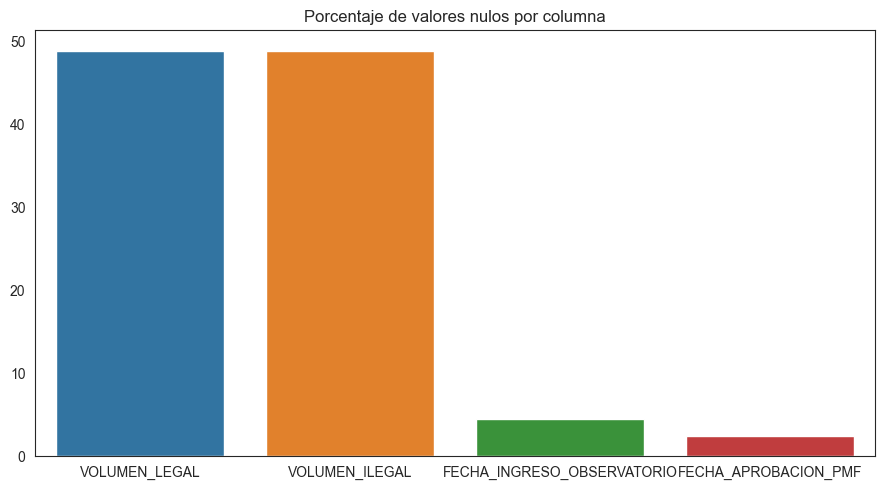

In [10]:
#Graficamos las columnas con valores nulos
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x=data_na_porc.index, y=data_na_porc)
plt.title("Porcentaje de valores nulos por columna")
plt.tight_layout()
plt.show()

In [11]:
#Se identificó 5 columnas con valores nulos o en blanco
#RESOLUCION_APRUEBA_PMF
data_na_resol_aprob = data[(data["RESOLUCION_APRUEBA_PMF"]==" ") | (data["RESOLUCION_APRUEBA_PMF"]=="NO CONSIGNA")]
data_na_resol_aprob.tail()

,FECHA_CORTE,ANIO_SUPERV,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_INGRESO_OBSERVATORIO
5737,20230512,2009,Comunidad Nativa,250401,UCAYALI,PURUS,PURUS,25-PUC/P-MAD-A-023-03,COMUNIDAD NATIVA COLOMBIANA,1200.000,POA 4,,NaN,0.000,0,0,0.000,0.000,1427-2009-AG-DGFFS,20090814,0,0,NaN,NaN,LISTA VERDE,NaN
5801,20230512,2009,Comunidad Nativa,250401,UCAYALI,PURUS,PURUS,25-PUC/P-MAD-A-045-05,COMUNIDAD NATIVA SANTA REY,14126.000,POA 2,,NaN,0.000,0,0,0.000,0.000,1428-2009-AG-DGFFS-DGEFFS,20090814,0,0,NaN,NaN,LISTA VERDE,NaN
5811,20230512,2009,Comunidad Nativa,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,25-PUC/P-MAD-A-048-05,COMUNIDAD NATIVA EL TRIUNFO,1000.000,POA 2,,NaN,0.000,0,0,0.000,0.000,1310-2009-MINAG-DGFFS,20090814,0,0,NaN,NaN,LISTA VERDE,NaN
6019,20230512,2015,No Maderables Casta¤a,170101,MADRE DE DIOS,TAMBOPATA,TAMBOPATA,GOREMAD-GGR-PRMRFFS-DER/TAM-C-OPB/007-11,MALATESTA VIGORIA CARLOS ALBERTO,582.790,POA 1,NO CONSIGNA,NaN,582.790,0,0,0.000,0.000,100-2015-OSINFOR/06.1.1,20150825,150,1,NaN,NaN,LISTA VERDE,20150519.000
6277,20230512,2015,No Maderables Casta¤a,170203,MADRE DE DIOS,MANU,MADRE DE DIOS,GOREMAD-GRRNYGMA-DRFFS/TAM-C-OPB-033-12,CAMALA LIZARASO WUILLTON,1133.530,POA 1,NO CONSIGNA,NaN,1133.530,0,0,0.000,0.000,085-2015-OSINFOR/06.1.1,20150827,52,7,NaN,NaN,LISTA VERDE,20150519.000


In [12]:
data_na_resol_aprob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 90 to 6277
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FECHA_CORTE                 157 non-null    int64  
 1   ANIO_SUPERV                 157 non-null    int64  
 2   MODALIDAD_APROVECHAMIENTO   157 non-null    object 
 3   UBIGEO                      157 non-null    int64  
 4   DEPARTAMENTO                157 non-null    object 
 5   PROVINCIA                   157 non-null    object 
 6   DISTRITO                    157 non-null    object 
 7   TITULO_HABILITANTE          157 non-null    object 
 8   TITULAR                     157 non-null    object 
 9   AREA_TH                     157 non-null    float64
 10  NOMBRE_PMF                  157 non-null    object 
 11  RESOLUCION_APRUEBA_PMF      157 non-null    object 
 12  FECHA_APROBACION_PMF        5 non-null      float64
 13  AREA_POA                    157 non-nu

In [13]:
data_na_resol_aprob[~data_na_resol_aprob["FECHA_APROBACION_PMF"].isna()]

,FECHA_CORTE,ANIO_SUPERV,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_INGRESO_OBSERVATORIO
2931,20230512,2009,Maderables,170301,MADRE DE DIOS,TAHUAMANU,I¥APARI,17-TAH/C-J-033-02,EMPRESA AGRICOLA LAS GRAMAS S.A.C.,46914.000,POA 4,NO CONSIGNA,20090218.000,1686.300,0,0,0.000,0.000,056-2009-OSINFOR-DSCFFS,20091203,30,0,NaN,NaN,LISTA VERDE,20150519.000
3961,20230512,2010,Maderables,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,17-TAM/C-J-018-03,MADERERA INDUSTRIAL SABOR A SELVA S.A.C,8076.000,POA 5,NO CONSIGNA,20080829.000,8076.000,0,0,0.000,0.000,063-2010-OSINFOR-DSCFFS,20100317,30,1,NaN,NaN,LISTA VERDE,20150519.000
4887,20230512,2009,Maderables,220602,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,22-SAM/C-J-031-03,EMPRESA INDUSTRIA FORESTAL TOCACHE SAC,6966.000,POA 1,,20181121.000,468.520,177,6,2247.615,0.000,042-2009-OSINFOR-DSCFFS,20091219,48,0,NaN,NaN,LISTA VERDE,20150519.000
5009,20230512,2009,Maderables,250204,UCAYALI,ATALAYA,YURUA,25-ATA/C-J-025-02,INDUSTRIA FORESTAL HUAYRURO SAC,41707.000,POA 1,NO CONSIGNA,20050101.000,0.000,0,0,0.000,0.000,038-2009-OSINFOR-DSCFFS,20091205,0,0,NaN,NaN,LISTA VERDE,20150519.000
5039,20230512,2009,Maderables,250104,UCAYALI,CORONEL PORTILLO,MASISEA,25-ATA/C-J-051-03,PANDURO NAVARRO OMER,6002.000,POA 1,NO CONSIGNA,20050101.000,300.000,0,0,0.000,0.000,057-2009-OSINFOR-DSCFFS,20091213,28,0,NaN,NaN,LISTA VERDE,20150519.000


In [14]:
data_na_resol_aprob[["VOL_APROBADO","VOL_MOVILIZADO"]].value_counts()

VOL_APROBADO  VOL_MOVILIZADO
0.000         0.000             156
2247.615      0.000               1
Name: count, dtype: int64

In [15]:
data_na_resol_aprob.describe()

,FECHA_CORTE,ANIO_SUPERV,UBIGEO,AREA_TH,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,FECHA_INGRESO_OBSERVATORIO
count,157.000,157.000,157.000,157.000,5.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,157.000,0.000,0.000,15.000
mean,20230512.000,2007.777,179509.650,13330.790,20090474.000,102.968,1.127,0.038,14.316,0.000,20078660.102,4.076,0.981,NaN,NaN,20150519.000
std,0.000,2.505,59533.493,12811.694,53781.801,683.082,14.126,0.479,179.379,0.000,25007.920,20.715,11.582,NaN,NaN,0.000
min,20230512.000,2004.000,10202.000,0.000,20050101.000,0.000,0.000,0.000,0.000,0.000,20041021.000,0.000,0.000,NaN,NaN,20150519.000
25%,20230512.000,2006.000,160403.000,5217.000,20050101.000,0.000,0.000,0.000,0.000,0.000,20061106.000,0.000,0.000,NaN,NaN,20150519.000
50%,20230512.000,2007.000,170301.000,8272.000,20080829.000,0.000,0.000,0.000,0.000,0.000,20071226.000,0.000,0.000,NaN,NaN,20150519.000
75%,20230512.000,2009.000,250101.000,17744.000,20090218.000,0.000,0.000,0.000,0.000,0.000,20090814.000,0.000,0.000,NaN,NaN,20150519.000
max,20230512.000,2015.000,250401.000,54021.000,20181121.000,8076.000,177.000,6.000,2247.615,0.000,20150922.000,164.000,145.000,NaN,NaN,20150519.000


In [16]:
data_na_resol_aprob[(data_na_resol_aprob["ARBOLES_INEXISTENTES"]>0) | (data_na_resol_aprob["ARBOLES_SUPERVISADOS"]>0)]

,FECHA_CORTE,ANIO_SUPERV,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,FECHA_APROBACION_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_INGRESO_OBSERVATORIO
2931,20230512,2009,Maderables,170301,MADRE DE DIOS,TAHUAMANU,I¥APARI,17-TAH/C-J-033-02,EMPRESA AGRICOLA LAS GRAMAS S.A.C.,46914.000,POA 4,NO CONSIGNA,20090218.000,1686.300,0,0,0.000,0.000,056-2009-OSINFOR-DSCFFS,20091203,30,0,NaN,NaN,LISTA VERDE,20150519.000
3074,20230512,2015,No Maderables Casta¤a,170303,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,17-TAH/C-OPB-A-055-08,RAMIREZ TRIGOSO YERSON EMANUEL,1584.940,POA 1,,NaN,1584.940,0,0,0.000,0.000,062-2015-OSINFOR/06.1.1,20150717,110,0,NaN,NaN,LISTA VERDE,20150519.000
3159,20230512,2015,No Maderables Casta¤a,170303,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,17-TAH/C-OPB-J-033-04,MARCHENA MENDIETA PEDRO,199.540,POA 1,NO CONSIGNA,NaN,680.000,0,0,0.000,0.000,127-2015-OSINFOR/06.1.1,20150920,164,145,NaN,NaN,LISTA VERDE,20150519.000
3961,20230512,2010,Maderables,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,17-TAM/C-J-018-03,MADERERA INDUSTRIAL SABOR A SELVA S.A.C,8076.000,POA 5,NO CONSIGNA,20080829.000,8076.000,0,0,0.000,0.000,063-2010-OSINFOR-DSCFFS,20100317,30,1,NaN,NaN,LISTA VERDE,20150519.000
4850,20230512,2010,Maderables,221001,SAN MARTIN,TOCACHE,TOCACHE,22-SAM/C-I-AD-003-06,BIAVO S.A.C.,39997.660,POA 1,NO CONSIGNA,NaN,100.000,0,0,0.000,0.000,041-2010-OSINFOR-DSCFFS,20100221,20,0,NaN,NaN,LISTA VERDE,20150519.000
4887,20230512,2009,Maderables,220602,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,22-SAM/C-J-031-03,EMPRESA INDUSTRIA FORESTAL TOCACHE SAC,6966.000,POA 1,,20181121.000,468.520,177,6,2247.615,0.000,042-2009-OSINFOR-DSCFFS,20091219,48,0,NaN,NaN,LISTA VERDE,20150519.000
5039,20230512,2009,Maderables,250104,UCAYALI,CORONEL PORTILLO,MASISEA,25-ATA/C-J-051-03,PANDURO NAVARRO OMER,6002.000,POA 1,NO CONSIGNA,20050101.000,300.000,0,0,0.000,0.000,057-2009-OSINFOR-DSCFFS,20091213,28,0,NaN,NaN,LISTA VERDE,20150519.000
5441,20230512,2010,Forestaci¢n y/o Reforestaci¢n,250106,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,25-PUC/C-FYR-IFFS-001-06,LàPEZ NIETO ANTONIO JAIME,3296.570,POA 1,NO CONSIGNA,NaN,111.670,0,0,0.000,0.000,013-2010-OSINFOR-DSCFFS,20100120,8,0,NaN,NaN,LISTA VERDE,20150519.000
6019,20230512,2015,No Maderables Casta¤a,170101,MADRE DE DIOS,TAMBOPATA,TAMBOPATA,GOREMAD-GGR-PRMRFFS-DER/TAM-C-OPB/007-11,MALATESTA VIGORIA CARLOS ALBERTO,582.790,POA 1,NO CONSIGNA,NaN,582.790,0,0,0.000,0.000,100-2015-OSINFOR/06.1.1,20150825,150,1,NaN,NaN,LISTA VERDE,20150519.000
6277,20230512,2015,No Maderables Casta¤a,170203,MADRE DE DIOS,MANU,MADRE DE DIOS,GOREMAD-GRRNYGMA-DRFFS/TAM-C-OPB-033-12,CAMALA LIZARASO WUILLTON,1133.530,POA 1,NO CONSIGNA,NaN,1133.530,0,0,0.000,0.000,085-2015-OSINFOR/06.1.1,20150827,52,7,NaN,NaN,LISTA VERDE,20150519.000


In [17]:
# Imputamos los valores en blanco con "SIN CERTIFICADO"
data.loc[data[data["RESOLUCION_APRUEBA_PMF"]==" "].index.to_list(), ["RESOLUCION_APRUEBA_PMF"]] = "SIN CERTIFICADO"

In [18]:
#eliminamos columnas que no nos servirán el análisis
data.drop(columns=["FECHA_CORTE", "ANIO_SUPERV", "FECHA_APROBACION_PMF", "FECHA_INGRESO_OBSERVATORIO"], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MODALIDAD_APROVECHAMIENTO  6400 non-null   object 
 1   UBIGEO                     6400 non-null   int64  
 2   DEPARTAMENTO               6400 non-null   object 
 3   PROVINCIA                  6400 non-null   object 
 4   DISTRITO                   6400 non-null   object 
 5   TITULO_HABILITANTE         6400 non-null   object 
 6   TITULAR                    6400 non-null   object 
 7   AREA_TH                    6400 non-null   float64
 8   NOMBRE_PMF                 6400 non-null   object 
 9   RESOLUCION_APRUEBA_PMF     6400 non-null   object 
 10  AREA_POA                   6400 non-null   float64
 11  NUM_ARBOLES_APROBADOS      6400 non-null   int64  
 12  CANT_ESPECIES_APROBADOS    6400 non-null   int64  
 13  VOL_APROBADO               6400 non-null   float

In [20]:
#Indentificamos nuevamente las columnas con valores nulos
data_na = data.isnull().sum().sort_values(ascending=False)
data_na = data_na[data_na>0]
data_na_porc = (data_na*100/len(data))
print(pd.concat([data_na, data_na_porc], axis=1))

                   0      1
VOLUMEN_LEGAL   3126 48.844
VOLUMEN_ILEGAL  3126 48.844


In [21]:
#Revisando valores nulos en las columnas de VOLUMEN_LEGAL y VOLUMEN_ILEGAL
data_na_volumen = data[data["VOLUMEN_ILEGAL"].isna() | data["VOLUMEN_LEGAL"].isna()]
data_na_volumen.head()

,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,FECHA_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO
8,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-009,COMUNIDAD NATIVA CHAYU ATUNSAMU,38.970,Declaraci¢n de Manejo,201-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,38.970,70,4,649.764,0.000,009-2017-OSINFOR/08.1.2,20171027,0,0,NaN,NaN,LISTA ROJA
9,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-010,COMUNIDAD NATIVA BICHANAK,108.190,Declaraci¢n de Manejo,202-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,108.190,162,10,620.340,0.000,006-2017-OSINFOR/08.1.2,20170703,0,0,NaN,NaN,LISTA ROJA
32,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2017-024,COMUNIDAD NATIVA YAMAYAKAT,399.290,Declaraci¢n de Manejo,Resoluci¢n Directoral Nø207-2017-GOBIERNO REGI...,399.290,71,10,537.800,105.170,002-2018-OSINFOR/08.1.2,20180606,0,0,NaN,NaN,LISTA ROJA
44,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,01-AMA/PER-FMC-2018-019,COMUNIDAD NATIVA KAGKAS,5890.190,PMFI (PO 1),Resoluci¢n Directoral Nø 171-2018-GOBIERNO REG...,912.030,228,7,1608.610,455.370,00218-2022-OSINFOR/08.1.2,20221024,11,0,NaN,NaN,LISTA VERDE
77,Predio Privado,10605,AMAZONAS,RODRIGUEZ DE MENDOZA,LIMABAMBA,01-AMA/PER-FMP-2019-03,FERNANDEZ ZELADA JUAN BAUTISTA,48.630,Declaraci¢n de Manejo,Resoluci¢n Directoral Nø 049-2019-GOBIERNO REG...,48.630,62,1,267.698,5.688,073-2020-OSINFOR/08.1.2,20200706,0,0,NaN,NaN,LISTA VERDE


In [22]:
# Configuramos para una mejor visualización
data["UBIGEO"] = data["UBIGEO"].astype("object")
data["FECHA_SUPERV"] = pd.to_datetime(data["FECHA_SUPERVISION"], format="%Y%m%d")
data.drop("FECHA_SUPERVISION", axis=1, inplace=True)

In [23]:
# Dividimos columnas numericos y tipo object
feat_num=data.select_dtypes(include=[np.number])
feat_obj=data.select_dtypes(include=["object"])

In [24]:
feat_num.head()

,AREA_TH,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL
0,287.650,287.650,58,4,648.290,405.910,54,2,167.331,238.579
1,221.330,221.330,72,9,635.980,460.280,80,2,69.860,390.420
2,633.330,633.330,35,1,467.810,467.730,44,0,201.733,265.997
3,157.910,157.910,71,2,649.908,562.720,63,0,171.000,244.396
4,321.460,321.460,62,3,649.973,649.790,76,0,600.097,49.693


In [25]:
data[["FECHA_SUPERV", "VOLUMEN_ILEGAL", "VOLUMEN_LEGAL"]].head()

,FECHA_SUPERV,VOLUMEN_ILEGAL,VOLUMEN_LEGAL
0,2017-10-17,167.331,238.579
1,2017-10-09,69.860,390.420
2,2019-11-04,201.733,265.997
3,2020-02-22,171.000,244.396
4,2019-10-24,600.097,49.693


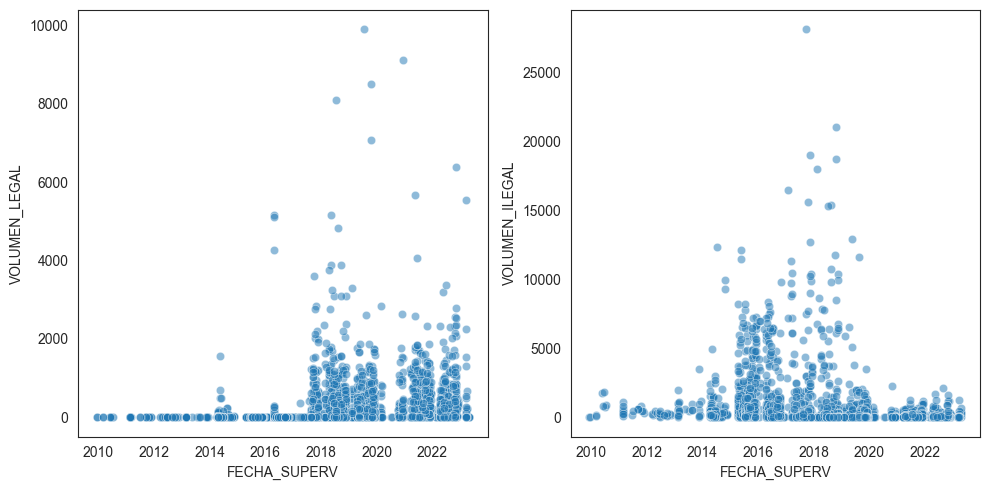

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x="FECHA_SUPERV", y="VOLUMEN_LEGAL", data=data, alpha=0.5, ax=ax[0])
sns.scatterplot(x="FECHA_SUPERV", y="VOLUMEN_ILEGAL", data=data, alpha=0.5, ax=ax[1])
plt.tight_layout()
plt.show()

In [27]:
# Imputamos los valores nulos con 0, suponemos que no existe volumenes legales o ilegales
data.loc[:, ["VOLUMEN_LEGAL", "VOLUMEN_ILEGAL"]] = data[["VOLUMEN_LEGAL", "VOLUMEN_ILEGAL"]].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MODALIDAD_APROVECHAMIENTO  6400 non-null   object        
 1   UBIGEO                     6400 non-null   object        
 2   DEPARTAMENTO               6400 non-null   object        
 3   PROVINCIA                  6400 non-null   object        
 4   DISTRITO                   6400 non-null   object        
 5   TITULO_HABILITANTE         6400 non-null   object        
 6   TITULAR                    6400 non-null   object        
 7   AREA_TH                    6400 non-null   float64       
 8   NOMBRE_PMF                 6400 non-null   object        
 9   RESOLUCION_APRUEBA_PMF     6400 non-null   object        
 10  AREA_POA                   6400 non-null   float64       
 11  NUM_ARBOLES_APROBADOS      6400 non-null   int64         
 12  CANT_E

LIMPIAR CADENA DE CARACTERES

In [28]:
feat_obj.head()

,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,NUM_INFORME_SUPERVISION,OBSERVATORIO
0,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-001,COMUNIDAD NATIVA YAMAKENTSA,Declaraci¢n de Manejo,176-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,299-2017-OSINFOR/08.1.2,LISTA VERDE
1,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-002,COMUNIDAD NATIVA WAISIM,Declaraci¢n de Manejo,177-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,297-2017-OSINFOR/08.1.2,LISTA VERDE
2,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,01-AMA/PER-FMC-2016-003,COMUNIDAD NATIVA FORTALEZA,Declaraci¢n de Manejo,174-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,324-2019-OSINFOR/08.1.2,LISTA ROJA
3,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-004,COMUNIDAD NATIVA SAWIENTSA,Declaraci¢n de Manejo,180-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,011-2020-OSINFOR/08.1.2,LISTA VERDE
4,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-005,COMUNIDAD NATIVA UMPUNCHIG,Declaraci¢n de Manejo,194-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,295-2019-OSINFOR/08.1.2,LISTA ROJA


In [29]:
"""for col in feat_obj.columns:
    print(data[col].value_counts())"""

'for col in feat_obj.columns:\n    print(data[col].value_counts())'

In [30]:
# MODALIDAD_APROVECHAMIENTO
data.loc[data[data["MODALIDAD_APROVECHAMIENTO"]=="Forestaci¢n y/o Reforestaci¢n"].index.to_list(), ["MODALIDAD_APROVECHAMIENTO"]] = "Forestación y/o Reforestación"
data.loc[data[data["MODALIDAD_APROVECHAMIENTO"]=="No Maderables Casta¤a"].index.to_list(), ["MODALIDAD_APROVECHAMIENTO"]] = "No Maderables Castaña"

In [31]:
# PROVINCIA 
data.loc[data[data["PROVINCIA"]=="MARA¥ON"].index.to_list(), ["PROVINCIA"]] = "MARAÑON"
data.loc[data[data["PROVINCIA"]=="DATEM DEL MARA¥ON"].index.to_list(), ["PROVINCIA"]] = "DATEM DEL MARAÑON"

In [32]:
# DISTRITO I¥APARI CONSTITUCIàN KOS¥IPATA
data.loc[data[data["DISTRITO"]=="I¥APARI"].index.to_list(), ["DISTRITO"]] = "IÑAPARI"
data.loc[data[data["DISTRITO"]=="CONSTITUCIàN"].index.to_list(), ["DISTRITO"]] = "CONSTITUCION"
data.loc[data[data["DISTRITO"]=="KOS¥IPATA"].index.to_list(), ["DISTRITO"]] = "KOSÑIPATA"

VALIDAR Y CREAR NUEVAS COLUMNAS

In [33]:
# UBIGEO
ubigeo = pd.read_csv("TB_UBIGEOS.csv")
ubigeo["ubigeo_reniec"] = ubigeo["ubigeo_reniec"].astype("object")
ubigeo["ubigeo_inei"] = ubigeo["ubigeo_inei"].astype("object")
ubigeo = ubigeo[["ubigeo_reniec", "ubigeo_inei", "departamento", "provincia", "distrito", "macroregion_inei", "superficie"]]
ubigeo_data = data[["UBIGEO", "DEPARTAMENTO", "PROVINCIA", "DISTRITO"]]

In [34]:
ubigeo.columns = ['ubigeo_reniec', 'UBIGEO', 'departamento', 'provincia', 'distrito',
       'macroregion_inei', 'superficie']
ubigeo.columns

Index(['ubigeo_reniec', 'UBIGEO', 'departamento', 'provincia', 'distrito',
       'macroregion_inei', 'superficie'],
      dtype='object')

In [35]:
ubigeo_total = pd.merge(ubigeo_data, ubigeo, how="left", on="UBIGEO")
ubigeo_total.head()

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo_reniec,departamento,provincia,distrito,macroregion_inei,superficie
0,10401,AMAZONAS,CONDORCANQUI,NIEVA,10601.000,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,4482.000
1,10401,AMAZONAS,CONDORCANQUI,NIEVA,10601.000,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,4482.000
2,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,10602.000,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,ORIENTE,8035.000
3,10205,AMAZONAS,BAGUA,IMAZA,10206.000,AMAZONAS,BAGUA,IMAZA,ORIENTE,4431.000
4,10205,AMAZONAS,BAGUA,IMAZA,10206.000,AMAZONAS,BAGUA,IMAZA,ORIENTE,4431.000


In [36]:
# CORRECTO UBIGEO
ubigeo_total[ubigeo_total["DISTRITO"] != ubigeo_total["distrito"]].shape

(0, 10)

In [37]:
# AGREGAMOS A DATA, SUPERFICIE TOTAL
ubigeo = ubigeo[["UBIGEO","macroregion_inei","superficie"]]
data = pd.merge(data, ubigeo, how="left", on="UBIGEO")
data["superficie"] = data["superficie"]*100
data.tail()

,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_SUPERV,macroregion_inei,superficie
6395,Predio Privado,170104,MADRE DE DIOS,TAMBOPATA,LABERINTO,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-028/12,LLAQUI QUISPE FLORENCIO,69.910,POA 1,224-2012-GOREMAD-GGR-PRMRFFS/ATFF-TAMBOPATA,69.910,104,10,650.586,0.000,358-2013-OSINFOR/06.2.1,114,18,0.000,0.000,LISTA VERDE,2013-11-22,SUR,276100.000
6396,Predio Privado,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-061/12,DIAZ HUAMAN NARCIZO ZENOBIO,15.000,POA 1,428-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,15.000,31,6,170.190,170.038,045-2014-OSINFOR/06.2.1,37,1,144.094,0.000,LISTA ROJA,2014-04-21,SUR,703200.000
6397,Predio Privado,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-062/12,QUISPE GUTIERRES MANUEL,25.160,POA 1,427-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,25.160,63,8,300.060,298.120,017-2014-OSINFOR/06.2.1,63,28,0.000,0.000,LISTA ROJA,2014-04-12,SUR,703200.000
6398,Predio Privado,170101,MADRE DE DIOS,TAMBOPATA,TAMBOPATA,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-092/12,BALBIN ARCHI ZENON,36.720,POA 1,669-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,36.720,60,14,316.340,0.000,025-2014-OSINFOR/06.2.1,62,2,0.000,0.000,LISTA VERDE,2014-04-17,SUR,2221900.000
6399,No Maderables Castaña,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DRFFS/TAM-C-OPB-026-12,YABAR MACEDA MILAGROS,473.480,Plan Complementario Maderable Nø 2 (POA No Con...,RDR Nø 1426-2016-GOREMAD-GRRNYGA-DRFFS,156.550,286,14,1548.400,658.467,239-2017-OSINFOR/08.1.1,86,0,0.000,260.757,LISTA VERDE,2017-11-27,SUR,703200.000


In [38]:
import re
def remover_puntos(dato):
    data_limpia = re.sub(r'[^\w\s]', '', dato)
    return data_limpia
data["TITULAR"] = data["TITULAR"].apply(remover_puntos)

In [39]:
#data["TITULAR"].value_counts()

In [40]:
list_pj = ["SA", "SAC", "SAA", "SRL", "EIRL", "SOCIEDAD", "EMPRESA", "COMUNIDAD"]
patron = '|'.join(list_pj)

# Apply the regex search to each sentence and create a new column
data["TIPO_PERSONA"] = data["TITULAR"].str.contains(patron, case=False, regex=True).apply(lambda x: "PERSONA JURIDICA" if x else "PERSONA NATURAL")
data["TIPO_PERSONA"].value_counts()


TIPO_PERSONA
PERSONA NATURAL     3514
PERSONA JURIDICA    2886
Name: count, dtype: int64

In [41]:
"""pd.set_option("display.max_rows", None)
data[["NOMBRE_PMF"]].value_counts()"""

'pd.set_option("display.max_rows", None)\ndata[["NOMBRE_PMF"]].value_counts()'

In [42]:
patron1 = r'(PMFI|POA \d+|POA No Consigna|PO \d+|PO No Consigna)'

# Extract the pattern using str.extract() and remove "POA " if present
data["PLAN"] = data["NOMBRE_PMF"].str.extract(patron1)
#data["NUMERO PO"] = data["NUMERO PO"].str.replace("POA ", "")

# Fill NaN values with the original string
data["PLAN"].fillna(data["NOMBRE_PMF"], inplace=True)

data.head()

,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_SUPERV,macroregion_inei,superficie,TIPO_PERSONA,PLAN
0,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-001,COMUNIDAD NATIVA YAMAKENTSA,287.650,Declaraci¢n de Manejo,176-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,287.650,58,4,648.290,405.910,299-2017-OSINFOR/08.1.2,54,2,167.331,238.579,LISTA VERDE,2017-10-17,ORIENTE,448200.000,PERSONA JURIDICA,Declaraci¢n de Manejo
1,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,01-AMA/PER-FMC-2016-002,COMUNIDAD NATIVA WAISIM,221.330,Declaraci¢n de Manejo,177-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,221.330,72,9,635.980,460.280,297-2017-OSINFOR/08.1.2,80,2,69.860,390.420,LISTA VERDE,2017-10-09,ORIENTE,448200.000,PERSONA JURIDICA,Declaraci¢n de Manejo
2,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,01-AMA/PER-FMC-2016-003,COMUNIDAD NATIVA FORTALEZA,633.330,Declaraci¢n de Manejo,174-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,633.330,35,1,467.810,467.730,324-2019-OSINFOR/08.1.2,44,0,201.733,265.997,LISTA ROJA,2019-11-04,ORIENTE,803500.000,PERSONA JURIDICA,Declaraci¢n de Manejo
3,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-004,COMUNIDAD NATIVA SAWIENTSA,157.910,Declaraci¢n de Manejo,180-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,157.910,71,2,649.908,562.720,011-2020-OSINFOR/08.1.2,63,0,171.000,244.396,LISTA VERDE,2020-02-22,ORIENTE,443100.000,PERSONA JURIDICA,Declaraci¢n de Manejo
4,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,01-AMA/PER-FMC-2016-005,COMUNIDAD NATIVA UMPUNCHIG,321.460,Declaraci¢n de Manejo,194-2016-GOBIERNO REGIONAL AMAZONAS/DEGBFS/D,321.460,62,3,649.973,649.790,295-2019-OSINFOR/08.1.2,76,0,600.097,49.693,LISTA ROJA,2019-10-24,ORIENTE,443100.000,PERSONA JURIDICA,Declaraci¢n de Manejo


In [43]:
data.loc[data[data["PLAN"]=="Declaraci¢n de Manejo"].index.to_list(), ["PLAN"]] = "DEMA"
data.loc[data[data["PLAN"]=="Reformulaci¢n del Declaraci¢n de Manejo"].index.to_list(), ["PLAN"]] = "DEMA"
data.loc[data[data["PLAN"]=="Plan de Adecuaci¢n del Plan Operativo (PO) ? POA I y POA II"].index.to_list(), ["PLAN"]] = "POA 2"
data.loc[data[data["PLAN"]=="Reingreso del"].index.to_list(), ["PLAN"]] = "POA 1"
data.loc[data[data["PLAN"]=="Reajuste de la Reformulacion del POA (PCA 02)"].index.to_list(), ["PLAN"]] = "POA 2"

In [44]:
data["PLAN"].value_counts().sort_index()

PLAN
DEMA                694
PMFI                421
PO 1                397
PO 10                19
PO 11                16
PO 12                15
PO 13                 4
PO 14                 9
PO 15                10
PO 16                 2
PO 17                 1
PO 2                 82
PO 3                 42
PO 4                 26
PO 5                 19
PO 6                 24
PO 7                 27
PO 8                 13
PO 9                 17
PO No Consigna       79
POA 1              2463
POA 10               60
POA 101               1
POA 104               1
POA 106               1
POA 11               30
POA 12               19
POA 13                7
POA 14                3
POA 15                1
POA 2               348
POA 3               255
POA 4               238
POA 5               226
POA 6               169
POA 7               117
POA 8               100
POA 9                87
POA 99                1
POA No Consigna     356
Name: count, dtype: int64

In [45]:
patron2 = r'(PMFI|POA|PO)'

# Extract the pattern using str.extract() and remove "POA " if present
data["TIPO_PLAN"] = data["PLAN"].str.extract(patron2)
#data["NUMERO PO"] = data["NUMERO PO"].str.replace("POA ", "")

# Fill NaN values with the original string
data["TIPO_PLAN"].fillna(data["PLAN"], inplace=True)

data.tail()

,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TITULO_HABILITANTE,TITULAR,AREA_TH,NOMBRE_PMF,RESOLUCION_APRUEBA_PMF,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOL_APROBADO,VOL_MOVILIZADO,NUM_INFORME_SUPERVISION,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO,FECHA_SUPERV,macroregion_inei,superficie,TIPO_PERSONA,PLAN,TIPO_PLAN
6395,Predio Privado,170104,MADRE DE DIOS,TAMBOPATA,LABERINTO,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-028/12,LLAQUI QUISPE FLORENCIO,69.910,POA 1,224-2012-GOREMAD-GGR-PRMRFFS/ATFF-TAMBOPATA,69.910,104,10,650.586,0.000,358-2013-OSINFOR/06.2.1,114,18,0.000,0.000,LISTA VERDE,2013-11-22,SUR,276100.000,PERSONA NATURAL,POA 1,POA
6396,Predio Privado,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-061/12,DIAZ HUAMAN NARCIZO ZENOBIO,15.000,POA 1,428-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,15.000,31,6,170.190,170.038,045-2014-OSINFOR/06.2.1,37,1,144.094,0.000,LISTA ROJA,2014-04-21,SUR,703200.000,PERSONA NATURAL,POA 1,POA
6397,Predio Privado,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-062/12,QUISPE GUTIERRES MANUEL,25.160,POA 1,427-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,25.160,63,8,300.060,298.120,017-2014-OSINFOR/06.2.1,63,28,0.000,0.000,LISTA ROJA,2014-04-12,SUR,703200.000,PERSONA NATURAL,POA 1,POA
6398,Predio Privado,170101,MADRE DE DIOS,TAMBOPATA,TAMBOPATA,GOREMAD-GRR-PRMRFFS-DER/TAM-P-MAD-092/12,BALBIN ARCHI ZENON,36.720,POA 1,669-2012-GOREMAD-GGR-PRMRFFS/ATFFS-TAMBOPATA,36.720,60,14,316.340,0.000,025-2014-OSINFOR/06.2.1,62,2,0.000,0.000,LISTA VERDE,2014-04-17,SUR,2221900.000,PERSONA NATURAL,POA 1,POA
6399,No Maderables Castaña,170103,MADRE DE DIOS,TAMBOPATA,LAS PIEDRAS,GOREMAD-GRR-PRMRFFS-DRFFS/TAM-C-OPB-026-12,YABAR MACEDA MILAGROS,473.480,Plan Complementario Maderable Nø 2 (POA No Con...,RDR Nø 1426-2016-GOREMAD-GRRNYGA-DRFFS,156.550,286,14,1548.400,658.467,239-2017-OSINFOR/08.1.1,86,0,0.000,260.757,LISTA VERDE,2017-11-27,SUR,703200.000,PERSONA NATURAL,POA No Consigna,POA


In [46]:
data["TIPO_PLAN"].value_counts()

TIPO_PLAN
POA     4483
PO       802
DEMA     694
PMFI     421
Name: count, dtype: int64

In [47]:
data["%AREA_TH"] = data["AREA_TH"]/data["superficie"]
data["%AREA_POA"] = data["AREA_POA"]/data["superficie"]

In [48]:
def arbol_ilegal(dato):
    if dato >= 0:
        return dato
    else:
        return 0
def ilegal(dato):
    if dato > 0:
        return 1
    else:
        return 0
def infinito(dato):
    if dato == np.inf:
        return 0
    else:
        return dato
data["ARBOLES_ILEGAL"] = data["ARBOLES_SUPERVISADOS"]-data["NUM_ARBOLES_APROBADOS"]
data["ARBOLES_ILEGAL"] = data["ARBOLES_ILEGAL"].apply(arbol_ilegal)
data["%VOLUMEN_MOVILIZADO"] = data["VOL_MOVILIZADO"]/data["VOL_APROBADO"]
data["%VOLUMEN_ILEGAL"] = data["VOLUMEN_ILEGAL"]/data["VOL_MOVILIZADO"]
data["%VOLUMEN_LEGAL"] = data["VOLUMEN_LEGAL"]/data["VOL_MOVILIZADO"]
data["ILEGAL"] = data["VOLUMEN_ILEGAL"].apply(ilegal)
data["%VOLUMEN_MOVILIZADO"] = data["%VOLUMEN_MOVILIZADO"].apply(infinito)
data["%VOLUMEN_ILEGAL"] = data["%VOLUMEN_ILEGAL"].apply(infinito)
data["%VOLUMEN_LEGAL"] = data["%VOLUMEN_LEGAL"].apply(infinito)

In [49]:
#data["RESOLUCION_APRUEBA_PMF"].value_counts()

In [50]:
data.drop(["NUM_INFORME_SUPERVISION", "RESOLUCION_APRUEBA_PMF",'NOMBRE_PMF',"TITULO_HABILITANTE"], axis=1, inplace=True)

In [51]:
data.columns

Index(['MODALIDAD_APROVECHAMIENTO', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'TITULAR', 'AREA_TH', 'AREA_POA', 'NUM_ARBOLES_APROBADOS',
       'CANT_ESPECIES_APROBADOS', 'VOL_APROBADO', 'VOL_MOVILIZADO',
       'ARBOLES_SUPERVISADOS', 'ARBOLES_INEXISTENTES', 'VOLUMEN_ILEGAL',
       'VOLUMEN_LEGAL', 'OBSERVATORIO', 'FECHA_SUPERV', 'macroregion_inei',
       'superficie', 'TIPO_PERSONA', 'PLAN', 'TIPO_PLAN', '%AREA_TH',
       '%AREA_POA', 'ARBOLES_ILEGAL', '%VOLUMEN_MOVILIZADO', '%VOLUMEN_ILEGAL',
       '%VOLUMEN_LEGAL', 'ILEGAL'],
      dtype='object')

In [52]:
data.columns = ['MODALIDAD_APROVECHAMIENTO', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'TITULAR', 'AREA_TH', 'AREA_POA',
       'NUM_ARBOLES_APROBADOS', 'CANT_ESPECIES_APROBADOS', 'VOLUMEN_APROBADO',
       'VOLUMEN_MOVILIZADO', 'ARBOLES_SUPERVISADOS', 'ARBOLES_INEXISTENTES',
       'VOLUMEN_ILEGAL', 'VOLUMEN_LEGAL', 'OBSERVATORIO', 'FECHA_SUPERVISION',
       'MACROREGION', 'SUPERFICIE', 'TIPO_PERSONA', 'PLAN', 'TIPO_PLAN',"%AREA_TH", "%AREA_POA", "ARBOLES_ILEGAL", "%VOLUMEN_MOVILIZADO", "%VOLUMEN_ILEGAL", "%VOLUMEN_LEGAL", "ILEGAL"]

data = data[['PLAN', 'TIPO_PLAN', 'MODALIDAD_APROVECHAMIENTO', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'MACROREGION', 'SUPERFICIE', 'TITULAR', 'TIPO_PERSONA', 'AREA_TH',"%AREA_TH", 'AREA_POA',"%AREA_POA",
       'NUM_ARBOLES_APROBADOS', 'CANT_ESPECIES_APROBADOS', 'VOLUMEN_APROBADO', "FECHA_SUPERVISION",
       'VOLUMEN_MOVILIZADO', 'ARBOLES_SUPERVISADOS', 'ARBOLES_INEXISTENTES',
       'VOLUMEN_ILEGAL', 'VOLUMEN_LEGAL', "ARBOLES_ILEGAL", "%VOLUMEN_MOVILIZADO", "%VOLUMEN_ILEGAL", "%VOLUMEN_LEGAL", "ILEGAL", 'OBSERVATORIO']]

In [53]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
data["OBSERVATORIO_COD"] = label.fit_transform(data["OBSERVATORIO"])
data["OBSERVATORIO_COD"].value_counts()

OBSERVATORIO_COD
1    4043
0    2357
Name: count, dtype: int64

EDA

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PLAN                       6400 non-null   object        
 1   TIPO_PLAN                  6400 non-null   object        
 2   MODALIDAD_APROVECHAMIENTO  6400 non-null   object        
 3   UBIGEO                     6400 non-null   object        
 4   DEPARTAMENTO               6400 non-null   object        
 5   PROVINCIA                  6400 non-null   object        
 6   DISTRITO                   6400 non-null   object        
 7   MACROREGION                6400 non-null   object        
 8   SUPERFICIE                 6400 non-null   float64       
 9   TITULAR                    6400 non-null   object        
 10  TIPO_PERSONA               6400 non-null   object        
 11  AREA_TH                    6400 non-null   float64       
 12  %AREA_

In [55]:
data.head()

,PLAN,TIPO_PLAN,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,MACROREGION,SUPERFICIE,TITULAR,TIPO_PERSONA,AREA_TH,%AREA_TH,AREA_POA,%AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOLUMEN_APROBADO,FECHA_SUPERVISION,VOLUMEN_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,ARBOLES_ILEGAL,%VOLUMEN_MOVILIZADO,%VOLUMEN_ILEGAL,%VOLUMEN_LEGAL,ILEGAL,OBSERVATORIO,OBSERVATORIO_COD
0,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA YAMAKENTSA,PERSONA JURIDICA,287.650,0.001,287.650,0.001,58,4,648.290,2017-10-17,405.910,54,2,167.331,238.579,0,0.626,0.412,0.588,1,LISTA VERDE,1
1,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA WAISIM,PERSONA JURIDICA,221.330,0.000,221.330,0.000,72,9,635.980,2017-10-09,460.280,80,2,69.860,390.420,8,0.724,0.152,0.848,1,LISTA VERDE,1
2,DEMA,DEMA,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,ORIENTE,803500.000,COMUNIDAD NATIVA FORTALEZA,PERSONA JURIDICA,633.330,0.001,633.330,0.001,35,1,467.810,2019-11-04,467.730,44,0,201.733,265.997,9,1.000,0.431,0.569,1,LISTA ROJA,0
3,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA SAWIENTSA,PERSONA JURIDICA,157.910,0.000,157.910,0.000,71,2,649.908,2020-02-22,562.720,63,0,171.000,244.396,0,0.866,0.304,0.434,1,LISTA VERDE,1
4,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA UMPUNCHIG,PERSONA JURIDICA,321.460,0.001,321.460,0.001,62,3,649.973,2019-10-24,649.790,76,0,600.097,49.693,14,1.000,0.924,0.076,1,LISTA ROJA,0


DISTRIBUCIÓN UNIVARIADO

              CUENTA  PORCENTAJE
OBSERVATORIO                    
LISTA VERDE     4043      63.172
LISTA ROJA      2357      36.828


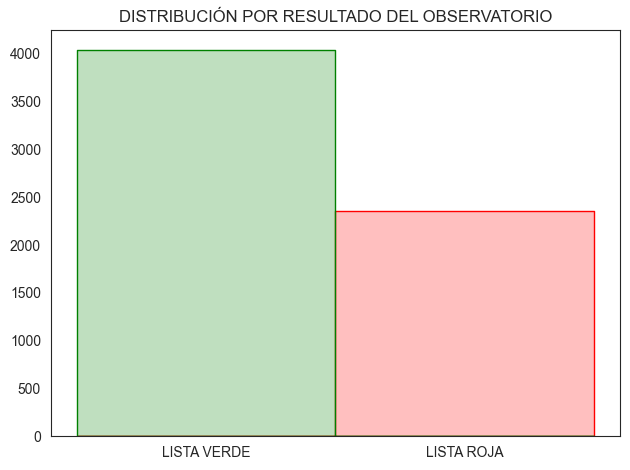

In [56]:
#OBSERVATORIO
df = pd.concat([data["OBSERVATORIO"].value_counts(), 
                data["OBSERVATORIO"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df)
plot=sns.histplot(x="OBSERVATORIO", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN POR RESULTADO DEL OBSERVATORIO")
plt.tight_layout()
plt.show()

           CUENTA  PORCENTAJE
TIPO_PLAN                    
POA          4483      70.047
PO            802      12.531
DEMA          694      10.844
PMFI          421       6.578


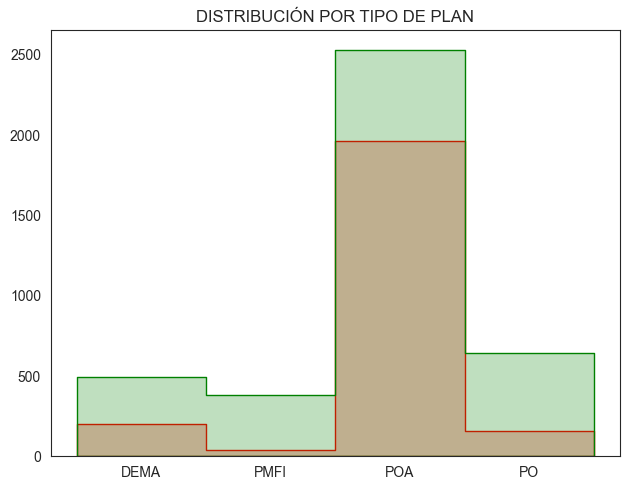

In [57]:
#TIPO PLAN
df = pd.concat([data["TIPO_PLAN"].value_counts(), 
                data["TIPO_PLAN"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df)
plot=sns.histplot(x="TIPO_PLAN", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR TIPO DE PLAN")
plt.show()

                               CUENTA  PORCENTAJE
MODALIDAD_APROVECHAMIENTO                        
Predio Privado                   2419      37.797
Comunidad Nativa                 1196      18.688
Maderables                       1185      18.516
No Maderables Castaña            1125      17.578
Bosques Locales                   196       3.062
Forestación y/o Reforestación     191       2.984
Comunidad Campesina                45       0.703
No Maderables Shiringa             34       0.531
No Maderables Aguaje                9       0.141
                                            CUENTA  PORCENTAJE
OBSERVATORIO MODALIDAD_APROVECHAMIENTO                        
LISTA ROJA   Predio Privado                   1053      44.675
             Comunidad Nativa                  535      22.698
             Maderables                        317      13.449
             No Maderables Castaña             206       8.740
             Bosques Locales                   153       6.491
         

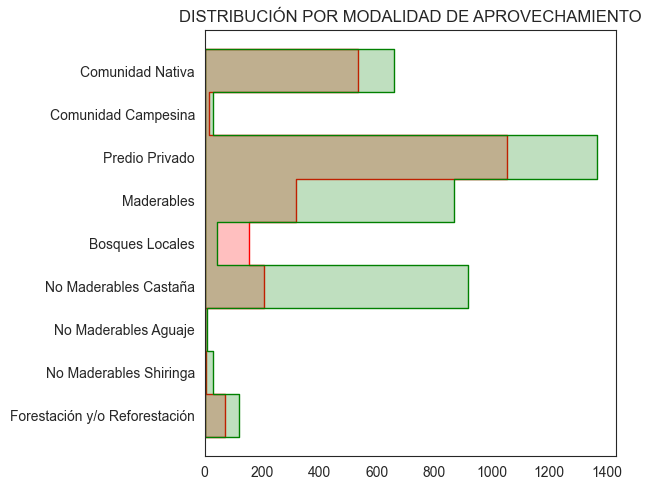

In [58]:
#MODALIDAD_APROVECHAMIENTO
df = pd.concat([data["MODALIDAD_APROVECHAMIENTO"].value_counts(), 
                data["MODALIDAD_APROVECHAMIENTO"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df)
df1 = pd.concat([data.groupby("OBSERVATORIO")["MODALIDAD_APROVECHAMIENTO"].value_counts(), 
                data.groupby("OBSERVATORIO")["MODALIDAD_APROVECHAMIENTO"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df1)
plot=sns.histplot(y="MODALIDAD_APROVECHAMIENTO", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR MODALIDAD DE APROVECHAMIENTO")
plt.show()

             CUENTA  PORCENTAJE  PORCENTAJE ACUMULADA
MACROREGION                                          
ORIENTE        3249      50.766                50.766
SUR            2607      40.734                91.500
CENTRO          520       8.125                99.625
NORTE            24       0.375               100.000


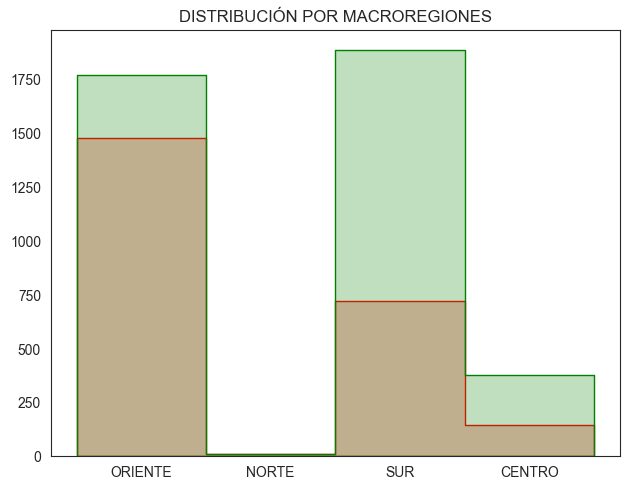

In [59]:
#MACROREGION
df = pd.concat([data["MACROREGION"].value_counts(), 
                data["MACROREGION"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
df['PORCENTAJE ACUMULADA'] = df['PORCENTAJE'].cumsum()
print(df)
plot=sns.histplot(x="MACROREGION", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR MACROREGIONES")
plt.show()

               CUENTA  PORCENTAJE  PORCENTAJE ACUMULADA
DEPARTAMENTO                                           
MADRE DE DIOS    2577      40.266                40.266
LORETO           1955      30.547                70.812
UCAYALI          1004      15.687                86.500
JUNIN             185       2.891                89.391
HUANUCO           176       2.750                92.141
PASCO             159       2.484                94.625
AMAZONAS          155       2.422                97.047
SAN MARTIN        135       2.109                99.156
CUSCO              30       0.469                99.625
CAJAMARCA          24       0.375               100.000
                            CUENTA  PORCENTAJE
OBSERVATORIO DEPARTAMENTO                     
LISTA ROJA   LORETO           1040      44.124
             MADRE DE DIOS     706      29.953
             UCAYALI           349      14.807
             AMAZONAS           72       3.055
             JUNIN              56       2.376

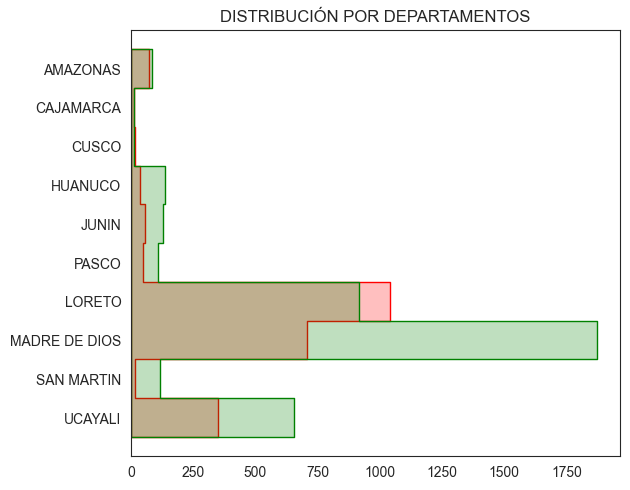

In [60]:
#DEPARTAMENTO
df = pd.concat([data["DEPARTAMENTO"].value_counts(), 
                data["DEPARTAMENTO"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
df['PORCENTAJE ACUMULADA'] = df['PORCENTAJE'].cumsum()
print(df)
df = pd.concat([data.groupby("OBSERVATORIO")["DEPARTAMENTO"].value_counts(), 
                data.groupby("OBSERVATORIO")["DEPARTAMENTO"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df)
plot=sns.histplot(y="DEPARTAMENTO", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR DEPARTAMENTOS")
plt.show()

                         CUENTA  PORCENTAJE  PORCENTAJE ACUMULADA
PROVINCIA                                                        
TAMBOPATA                  1421      22.203                22.203
TAHUAMANU                  1042      16.281                38.484
UCAYALI                     500       7.812                46.297
ATALAYA                     492       7.688                53.984
MAYNAS                      377       5.891                59.875
REQUENA                     376       5.875                65.750
CORONEL PORTILLO            345       5.391                71.141
MARISCAL RAMON CASTILLA     274       4.281                75.422
ALTO AMAZONAS               187       2.922                78.344
OXAPAMPA                    159       2.484                80.828
SATIPO                      154       2.406                83.234
PADRE ABAD                  151       2.359                85.594
LORETO                      134       2.094                87.688
PUERTO INC

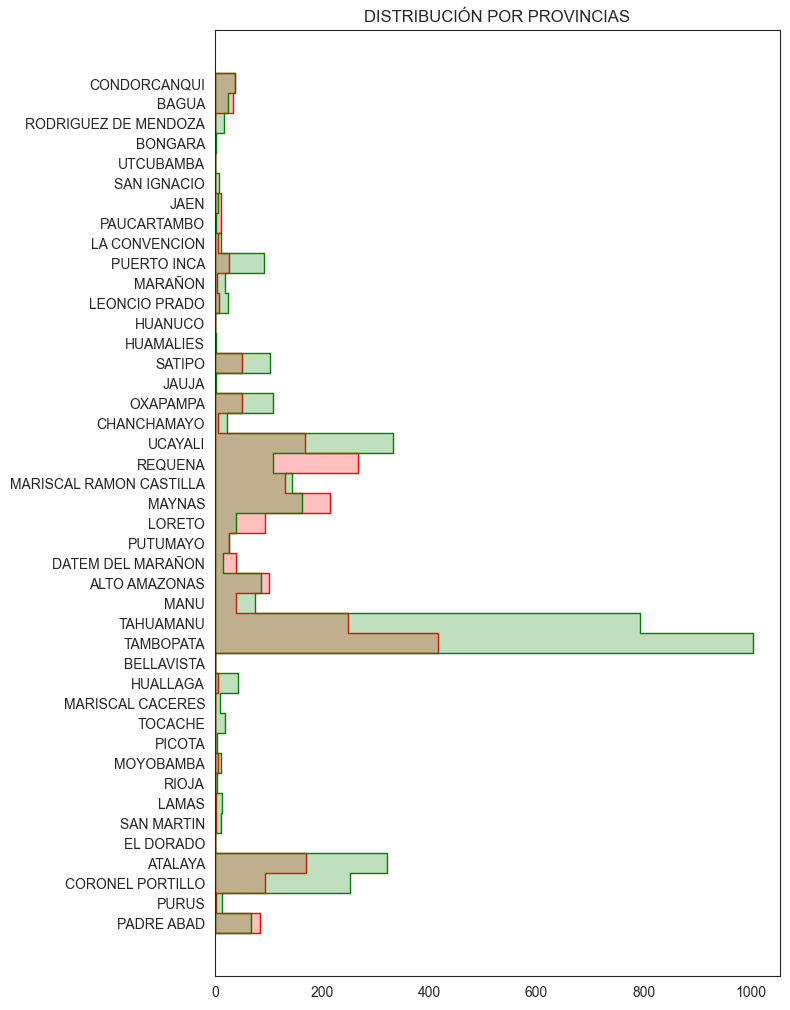

In [61]:
#PROVINCIA
df = pd.concat([data["PROVINCIA"].value_counts(), 
                data["PROVINCIA"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
df['PORCENTAJE ACUMULADA'] = df['PORCENTAJE'].cumsum()
print(df)
fig, ax = plt.subplots(figsize=(8, 10))
plot=sns.histplot(y="PROVINCIA", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR PROVINCIAS")
plt.show()

                  CUENTA  PORCENTAJE
TIPO_PERSONA                        
PERSONA NATURAL     3514      54.906
PERSONA JURIDICA    2886      45.094
                               CUENTA  PORCENTAJE
OBSERVATORIO TIPO_PERSONA                        
LISTA ROJA   PERSONA NATURAL     1358      57.616
             PERSONA JURIDICA     999      42.384
LISTA VERDE  PERSONA NATURAL     2156      53.327
             PERSONA JURIDICA    1887      46.673


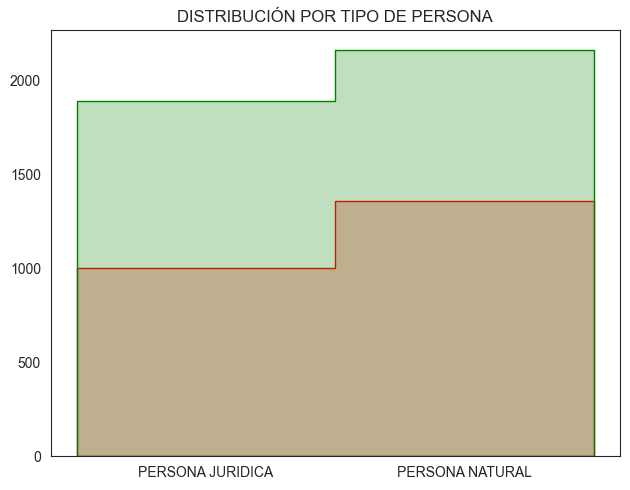

In [62]:
#TIPO_PERSONA
df = pd.concat([data["TIPO_PERSONA"].value_counts(), 
                data["TIPO_PERSONA"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df)
df1 = pd.concat([data.groupby("OBSERVATORIO")["TIPO_PERSONA"].value_counts(), 
                data.groupby("OBSERVATORIO")["TIPO_PERSONA"].value_counts(normalize=True).mul(100)],axis=1, keys=('CUENTA','PORCENTAJE'))
print(df1)
plot=sns.histplot(x="TIPO_PERSONA", data=data, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR TIPO DE PERSONA")
plt.show()

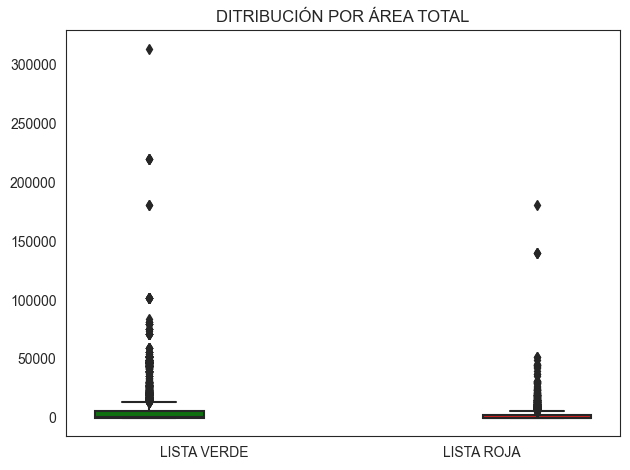

In [63]:
#AREA_TH
plot=sns.boxplot(y="AREA_TH", data=data[data["AREA_TH"]>0], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plot.set_title("DITRIBUCIÓN POR ÁREA TOTAL")
plt.tight_layout()
plt.show()

In [64]:
data[data["AREA_TH"] > 140000][["TITULAR","AREA_TH", "OBSERVATORIO"]].sort_values(by="AREA_TH", ascending=False)

,TITULAR,AREA_TH,OBSERVATORIO
4992,NUEVO SAN MARTIN SAC,313430.680,LISTA VERDE
2821,EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,220329.330,LISTA VERDE
2822,EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,220329.330,LISTA VERDE
2823,EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,220329.330,LISTA VERDE
2824,EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,220329.330,LISTA VERDE
5093,CONSORCIO FORESTAL AMAZONICO,180471.000,LISTA VERDE
5094,CONSORCIO FORESTAL AMAZONICO,180471.000,LISTA ROJA
5095,CONSORCIO FORESTAL AMAZONICO,180471.000,LISTA VERDE
2117,COMUNIDAD NATIVA FRAY PEDRO,140041.030,LISTA ROJA
2118,COMUNIDAD NATIVA FRAY PEDRO,140041.030,LISTA ROJA


In [65]:
data_group_titular = data.groupby("TITULAR")[["AREA_TH","AREA_POA"]].sum().sort_values(by="AREA_TH", ascending=False)
data_group_titular["PORCENTAJE"] = data_group_titular["AREA_TH"]/data_group_titular["AREA_TH"].sum()
data_group_titular["PORCENTAJE_ACUMULADO"] = data_group_titular["PORCENTAJE"].cumsum()
data_group_titular=data_group_titular[data_group_titular["PORCENTAJE_ACUMULADO"]<=0.20]
data_group_titular

,AREA_TH,AREA_POA,PORCENTAJE,PORCENTAJE_ACUMULADO
TITULAR,,,,
INVERSIONES FORESTALES CHULLACHAQUI SOCIEDAD ANONIMA CERRADAINFORC SAC,1256550.000,56698.890,0.038,0.038
EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,1226949.320,55535.000,0.037,0.075
MADERERA RIO ACRE SAC,842452.000,33715.000,0.025,0.101
MADERERA CANALES TAHUAMANU SAC,691056.000,28315.630,0.021,0.121
EMPRESA FORESTAL ECOLOGICA MAZAN SACGREEN GOLD FORESTRY PERé SAC,656670.880,24694.420,0.020,0.141
AQUAMAR INVESTMENTS INC SAC,644329.260,36614.780,0.019,0.161
COMUNIDAD NATIVA NUEVA ESPERANZA DEL MIRIN,560000.000,10761.020,0.017,0.178
CONSORCIO FORESTAL AMAZONICO,541413.000,17238.580,0.016,0.194


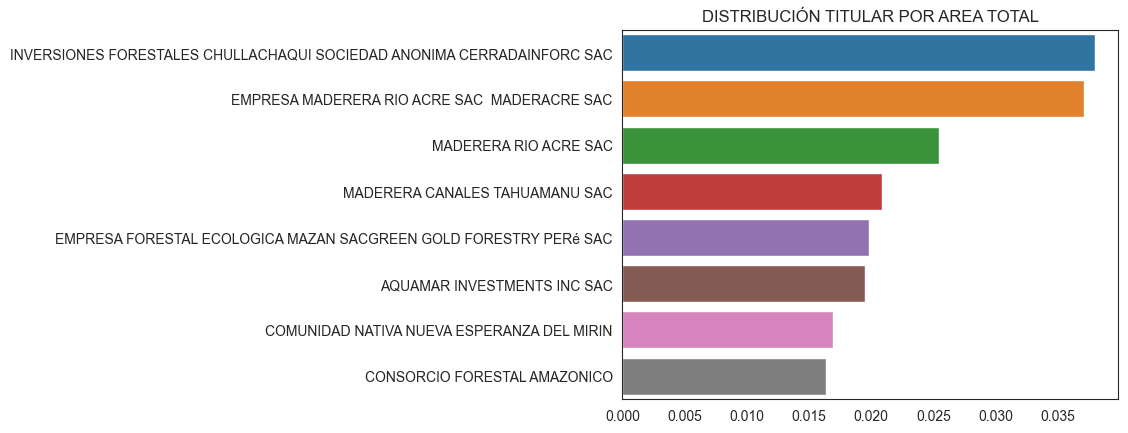

In [66]:
plot=sns.barplot(x=data_group_titular["PORCENTAJE"], y=data_group_titular.index)
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN TITULAR POR AREA TOTAL")
plt.show()

In [67]:
data.head()

,PLAN,TIPO_PLAN,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,MACROREGION,SUPERFICIE,TITULAR,TIPO_PERSONA,AREA_TH,%AREA_TH,AREA_POA,%AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOLUMEN_APROBADO,FECHA_SUPERVISION,VOLUMEN_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,ARBOLES_ILEGAL,%VOLUMEN_MOVILIZADO,%VOLUMEN_ILEGAL,%VOLUMEN_LEGAL,ILEGAL,OBSERVATORIO,OBSERVATORIO_COD
0,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA YAMAKENTSA,PERSONA JURIDICA,287.650,0.001,287.650,0.001,58,4,648.290,2017-10-17,405.910,54,2,167.331,238.579,0,0.626,0.412,0.588,1,LISTA VERDE,1
1,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA WAISIM,PERSONA JURIDICA,221.330,0.000,221.330,0.000,72,9,635.980,2017-10-09,460.280,80,2,69.860,390.420,8,0.724,0.152,0.848,1,LISTA VERDE,1
2,DEMA,DEMA,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,ORIENTE,803500.000,COMUNIDAD NATIVA FORTALEZA,PERSONA JURIDICA,633.330,0.001,633.330,0.001,35,1,467.810,2019-11-04,467.730,44,0,201.733,265.997,9,1.000,0.431,0.569,1,LISTA ROJA,0
3,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA SAWIENTSA,PERSONA JURIDICA,157.910,0.000,157.910,0.000,71,2,649.908,2020-02-22,562.720,63,0,171.000,244.396,0,0.866,0.304,0.434,1,LISTA VERDE,1
4,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA UMPUNCHIG,PERSONA JURIDICA,321.460,0.001,321.460,0.001,62,3,649.973,2019-10-24,649.790,76,0,600.097,49.693,14,1.000,0.924,0.076,1,LISTA ROJA,0


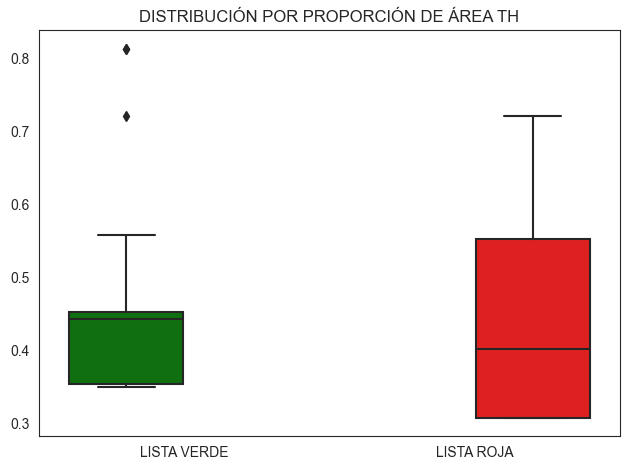

,TITULAR,DISTRITO,SUPERFICIE,AREA_TH,AREA_POA,%AREA_TH,%AREA_POA
937,FORESTAL SAN REGIS SAC,IQUITOS,35800.000,29125.000,1370.840,0.814,0.038
938,FORESTAL SAN REGIS SAC,IQUITOS,35800.000,29125.000,0.000,0.814,0.000
330,EMPRESA EXTRACTORES TIROL SAC,RUPA-RUPA,26700.000,19281.000,0.000,0.722,0.000
331,EMPRESA EXTRACTORES TIROL SAC,RUPA-RUPA,26700.000,19281.000,875.700,0.722,0.033
4854,CONSORCIO FORESTAL RÖO AZUL A,TRES UNIDOS,24700.000,13797.000,0.000,0.559,0.000


In [68]:
#%AREA_TH
plot=sns.boxplot(y="%AREA_TH", data=data[data["%AREA_TH"]>0.3], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plot.set_title("DISTRIBUCIÓN POR PROPORCIÓN DE ÁREA TH")
plt.tight_layout()
plt.show()
data[data["%AREA_TH"]>0.5][["TITULAR", "DISTRITO","SUPERFICIE","AREA_TH","AREA_POA", "%AREA_TH", "%AREA_POA"]].sort_values(by="%AREA_TH", ascending=False).head()

In [69]:
#%AREA_TH
plot=px.box(y="%AREA_POA", data_frame=data[data["%AREA_POA"]>0.02], x="OBSERVATORIO", color="OBSERVATORIO", color_discrete_map={"LISTA VERDE": "green", "LISTA ROJA": "red"}, title="DISTRIBUCIÓN POR PROPORCIÓN DE ÁREA POA", hover_data={"OBSERVATORIO": False}, hover_name=None)
for trace in plot.data:
    trace.update(showlegend=False)
plot.update_traces(hovertemplate='%{y:.3f}')
for trace in plot.data:
    trace.hoverlabel = None
plot.update_layout(title_x=0.5)
plot.update_xaxes(title_text=None)
plot.update_yaxes(title_text=None)
plot.show()

In [70]:
data_area_poa=data[data["%AREA_POA"]>0.04][["TITULAR", "DISTRITO","SUPERFICIE","AREA_TH","AREA_POA", "%AREA_TH", "%AREA_POA"]].sort_values(by="%AREA_POA", ascending=False)
data_area_poa["%AREA_POA"] = data_area_poa["%AREA_POA"]*100
data_area_poa["%AREA_TH"] = data_area_poa["%AREA_TH"]*100
data_area_poa

,TITULAR,DISTRITO,SUPERFICIE,AREA_TH,AREA_POA,%AREA_TH,%AREA_POA
5951,K B COMPANY SAC,MANANTAY,58000.000,26377.230,4029.270,45.478,6.947
945,INDUSTRIAL MADERERA ZAPOTE SA,NAUTA,667200.000,47592.410,45779.000,7.133,6.861
5398,COMUNIDAD NATIVA PUERTO NUEVO,IRAZOLA,99900.000,20000.000,4292.420,20.020,4.297
2944,INVERSIONES FORESTALES CHULLACHAQUI SOCIEDAD A...,TAHUAMANU,379400.000,101777.000,15358.810,26.826,4.048


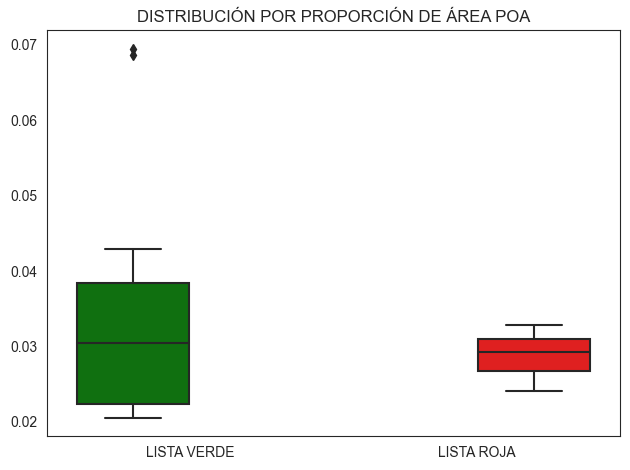

In [71]:
#%AREA_TH
plot=sns.boxplot(y="%AREA_POA", data=data[data["%AREA_POA"]>0.02], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plot.set_title("DISTRIBUCIÓN POR PROPORCIÓN DE ÁREA POA")
plt.tight_layout()
plt.show()

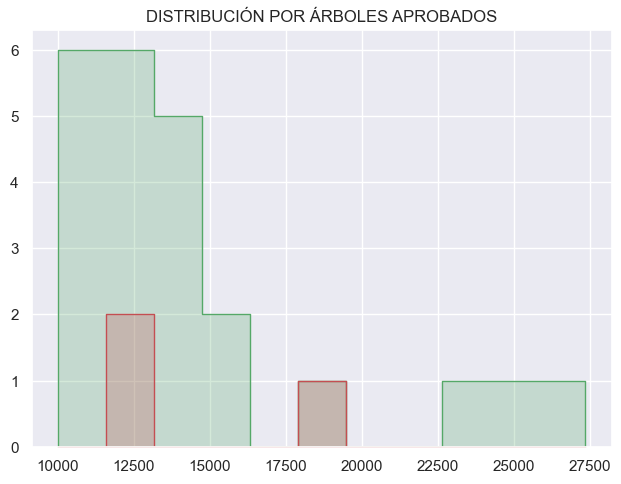

,TITULAR,NUM_ARBOLES_APROBADOS,PORCENTAJE
0,EMPRESA MADERERA RIO ACRE SAC MADERACRE SAC,82943,0.220
1,CONSORCIO FORESTAL AMAZONICO,57512,0.152
2,EMPRESA GAYA AMAZONICA SAC,50852,0.135
3,EMPRESA FORESTAL ECOLOGICA MAZAN SACGREEN GOLD...,28472,0.075
4,AQUAMAR INVESTMENTS INC SAC,26254,0.070


In [121]:
#NUM_ARBOLES_APROBADOS
plot=sns.histplot(x="NUM_ARBOLES_APROBADOS", data=data[data["NUM_ARBOLES_APROBADOS"]>10000], hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR ÁRBOLES APROBADOS")
plt.show()
data_arbol_apro = data[data["NUM_ARBOLES_APROBADOS"]>10000][["TITULAR", "DISTRITO","SUPERFICIE","AREA_TH","AREA_POA", "NUM_ARBOLES_APROBADOS"]]
data_arbol_apro=data_arbol_apro.groupby("TITULAR")["NUM_ARBOLES_APROBADOS"].sum()
data_arbol_apro = data_arbol_apro.sort_values(ascending=False).reset_index()
data_arbol_apro["PORCENTAJE"] = data_arbol_apro["NUM_ARBOLES_APROBADOS"]/data_arbol_apro["NUM_ARBOLES_APROBADOS"].sum()
data_arbol_apro.head()

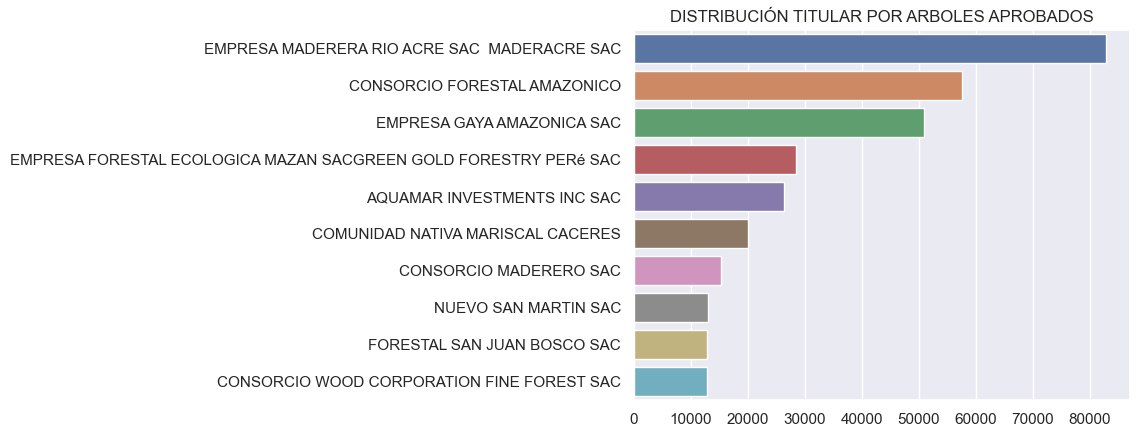

In [122]:
plot=sns.barplot(x="NUM_ARBOLES_APROBADOS", y="TITULAR", data=data_arbol_apro[:10])
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN TITULAR POR ARBOLES APROBADOS")
plt.show()

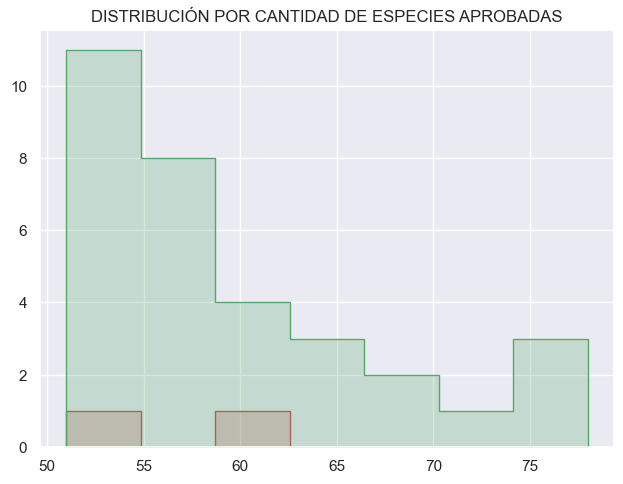

,TITULAR,CANT_ESPECIES_APROBADOS,PORCENTAJE
0,COMUNIDAD NATIVA MARISCAL CACERES,193,0.096
1,EMPRESA FORESTAL ECOLOGICA MAZAN SACGREEN GOLD...,153,0.076
2,COMUNIDAD NATIVA SANTA ROSA,112,0.056
3,AQUAMAR INVESTMENTS INC SAC,109,0.054
4,COMUNIDAD NATIVA SELVA DE ORO,78,0.039


In [123]:
#CANT_ESPECIES_APROBADOS
plot=sns.histplot(x="CANT_ESPECIES_APROBADOS", data=data[data["CANT_ESPECIES_APROBADOS"]>50], hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"}, legend=False, element="step")
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR CANTIDAD DE ESPECIES APROBADAS")
plt.show()
data_especie_aprob=data[data["CANT_ESPECIES_APROBADOS"]>50][["TITULAR", "DISTRITO","SUPERFICIE","AREA_TH","AREA_POA", "CANT_ESPECIES_APROBADOS"]].sort_values(by="CANT_ESPECIES_APROBADOS", ascending=False)
data_especie_aprob=data_especie_aprob.groupby("TITULAR")["CANT_ESPECIES_APROBADOS"].sum()
data_especie_aprob = data_especie_aprob.sort_values(ascending=False).reset_index()
data_especie_aprob["PORCENTAJE"] = data_especie_aprob["CANT_ESPECIES_APROBADOS"]/data_especie_aprob["CANT_ESPECIES_APROBADOS"].sum()
data_especie_aprob.head()

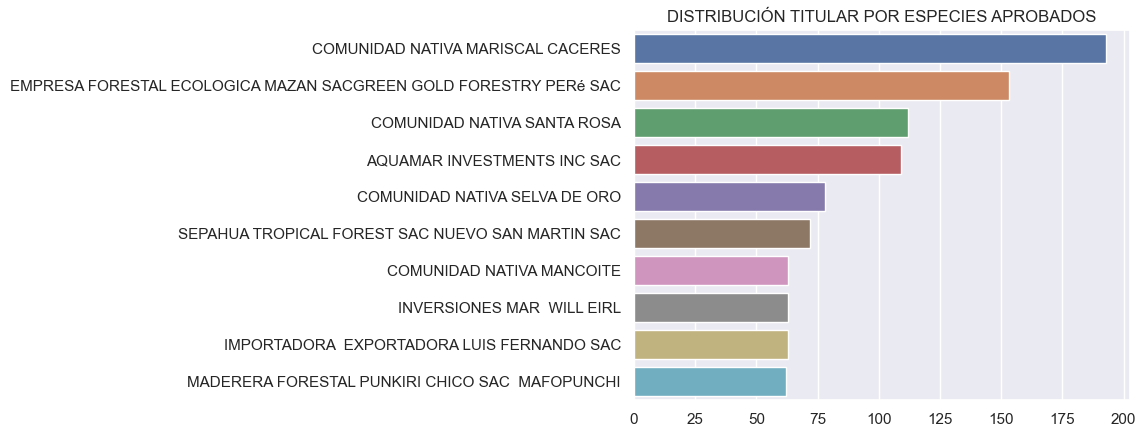

In [124]:
plot=sns.barplot(x="CANT_ESPECIES_APROBADOS", y="TITULAR", data=data_especie_aprob[:10])
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN TITULAR POR ESPECIES APROBADOS")
plt.show()

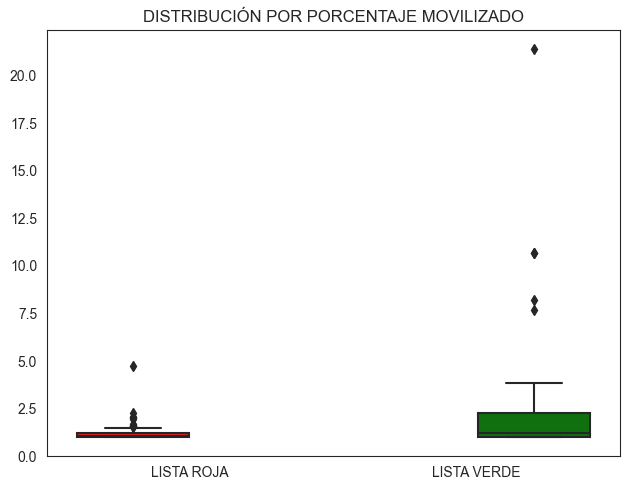

,TITULAR,DISTRITO,AREA_TH,VOLUMEN_APROBADO,VOLUMEN_MOVILIZADO,%VOLUMEN_MOVILIZADO
576,SEGURA ABISRROR IRMA,MAQUIA,20361.000,442.613,9446.962,21.344
1474,VILLANUEVA SOTO SERAFIN ARTURO,PAMPA HERMOSA,51.400,85.378,908.704,10.643
1471,VILLANUEVA SOTO SERAFIN ARTURO,PAMPA HERMOSA,51.400,85.378,908.704,10.643
577,SEGURA ABISRROR IRMA,MAQUIA,20361.000,1957.158,16001.165,8.176
1470,CEFERINA DE LA U REYES MABEL,PAMPA HERMOSA,49.240,89.059,683.827,7.678


In [74]:
#%VOLUMEN_MOVILIZADO
plot=sns.boxplot(y="%VOLUMEN_MOVILIZADO", data=data[data["%VOLUMEN_MOVILIZADO"]>=1], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plt.tight_layout()
plot.set_title("DISTRIBUCIÓN POR PORCENTAJE MOVILIZADO")
plt.show()
data[data["%VOLUMEN_MOVILIZADO"]>=1][["TITULAR", "DISTRITO","AREA_TH","VOLUMEN_APROBADO","VOLUMEN_MOVILIZADO", "%VOLUMEN_MOVILIZADO"]].sort_values(by="%VOLUMEN_MOVILIZADO", ascending=False).head()

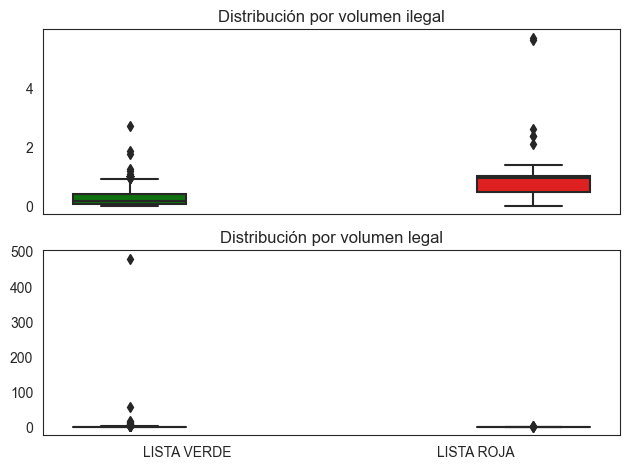

,TITULAR,DISTRITO,AREA_TH,VOLUMEN_MOVILIZADO,VOLUMEN_ILEGAL,%VOLUMEN_ILEGAL
36,COMUNIDAD NATIVA SHIJAP,IMAZA,44.890,78.680,447.466,5.687
1370,SORIA ROQUE ONESIMO,TENIENTE CESAR LOPEZ ROJAS,30.570,72.900,408.677,5.606
3929,INVERSIONES MADERERA BAJO COLORADO SOCIEDAD AN...,MADRE DE DIOS,11499.000,300.380,813.645,2.709
6219,MOSCOSO DELGADO MIGUEL GRIMALDO,INAMBARI,68.640,117.090,305.308,2.607
6220,MOSCOSO DELGADO MIGUEL GRIMALDO,INAMBARI,68.640,117.090,275.104,2.350


In [75]:
#%VOLUMEN_LEGAL - %VOLUMEN_ILEGAL
fig,ax=plt.subplots(2,1, sharex=True)
plot=sns.boxplot(y="%VOLUMEN_ILEGAL", data=data[data["%VOLUMEN_ILEGAL"]>0], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"},ax=ax[0])
plott=sns.boxplot(y="%VOLUMEN_LEGAL", data=data[data["%VOLUMEN_LEGAL"]>0], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"},ax=ax[1])
plot.set(xlabel=None, ylabel=None)
plott.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plott.legend().set_visible(False)
plot.set_title("Distribución por volumen ilegal")
plott.set_title("Distribución por volumen legal")
plt.tight_layout()
plt.show()
data[data["%VOLUMEN_ILEGAL"]>2][["TITULAR", "DISTRITO","AREA_TH","VOLUMEN_MOVILIZADO","VOLUMEN_ILEGAL","%VOLUMEN_ILEGAL"]].sort_values(by="%VOLUMEN_ILEGAL", ascending=False).head()

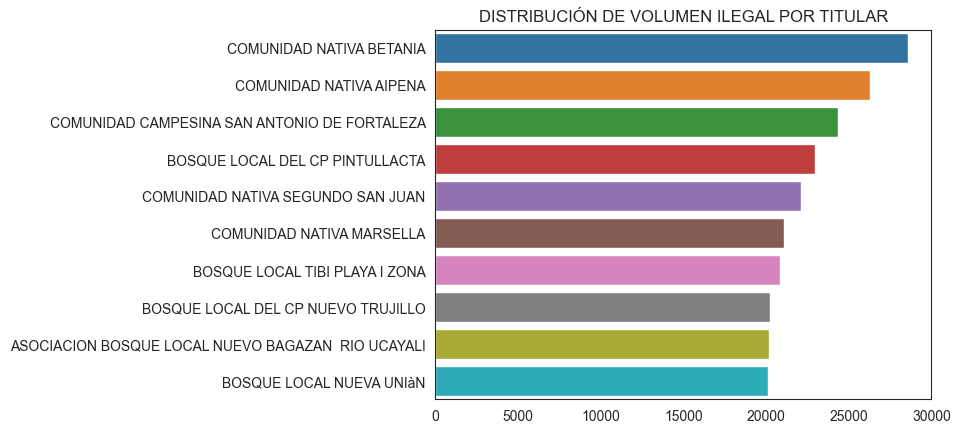

,VOLUMEN_ILEGAL,PORCENTAJE,PORCENTAJE_ACUMULADO
TITULAR,,,
COMUNIDAD NATIVA BETANIA,28575.650,0.014,0.014
COMUNIDAD NATIVA AIPENA,26257.626,0.013,0.028
COMUNIDAD CAMPESINA SAN ANTONIO DE FORTALEZA,24361.107,0.012,0.040
BOSQUE LOCAL DEL CP PINTULLACTA,22975.046,0.012,0.052
COMUNIDAD NATIVA SEGUNDO SAN JUAN,22122.401,0.011,0.063
COMUNIDAD NATIVA MARSELLA,21056.285,0.011,0.074
BOSQUE LOCAL TIBI PLAYA I ZONA,20820.786,0.011,0.084
BOSQUE LOCAL DEL CP NUEVO TRUJILLO,20240.374,0.010,0.095
ASOCIACION BOSQUE LOCAL NUEVO BAGAZAN RIO UCAYALI,20179.910,0.010,0.105


In [76]:
data_titular_ilegal=data.groupby("TITULAR")[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_titular_ilegal["PORCENTAJE"] = data_titular_ilegal["VOLUMEN_ILEGAL"]/data_titular_ilegal["VOLUMEN_ILEGAL"].sum()
data_titular_ilegal["PORCENTAJE_ACUMULADO"] = data_titular_ilegal["PORCENTAJE"].cumsum()
plot=sns.barplot(x=data_titular_ilegal["VOLUMEN_ILEGAL"][:10], y=data_titular_ilegal.index[:10])
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN DE VOLUMEN ILEGAL POR TITULAR")
plt.show()
data_titular_ilegal.head(10)

In [77]:
patron3 = r'(COMUNIDAD|BOSQUE)'
data_titular_ilegal.reset_index("TITULAR", inplace=True)
data_titular_ilegal["TIPO_TITULAR"] = data_titular_ilegal["TITULAR"].str.extract(patron3)
data_titular_ilegal["TIPO_TITULAR"].fillna(data_titular_ilegal["TITULAR"], inplace=True)

In [78]:
data_titular_ilegal[(data_titular_ilegal["TIPO_TITULAR"]=="COMUNIDAD")|(data_titular_ilegal["TIPO_TITULAR"]=="BOSQUE")][["VOLUMEN_ILEGAL","PORCENTAJE"]].sum()

VOLUMEN_ILEGAL   1205612.148
PORCENTAJE             0.611
dtype: float64

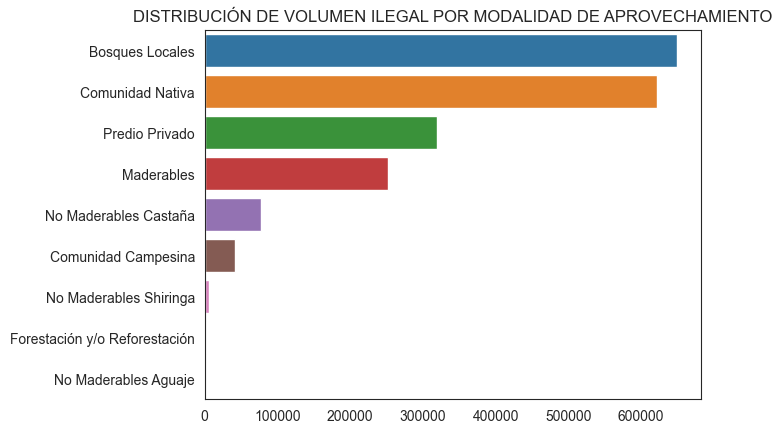

,VOLUMEN_ILEGAL,PORCENTAJE,PORCENTAJE_ACUMULATIVA
MODALIDAD_APROVECHAMIENTO,,,
Bosques Locales,649300.236,0.329,0.329
Comunidad Nativa,621792.650,0.315,0.645
Predio Privado,319078.162,0.162,0.806
Maderables,251933.686,0.128,0.934
No Maderables Castaña,77956.596,0.040,0.974


In [79]:
data_modalidad_ilegal=data.groupby("MODALIDAD_APROVECHAMIENTO")[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_modalidad_ilegal["PORCENTAJE"] = data_modalidad_ilegal["VOLUMEN_ILEGAL"]/data_modalidad_ilegal["VOLUMEN_ILEGAL"].sum()
data_modalidad_ilegal["PORCENTAJE_ACUMULATIVA"] =data_modalidad_ilegal["PORCENTAJE"].cumsum()
plot=sns.barplot(x=data_modalidad_ilegal["VOLUMEN_ILEGAL"], y=data_modalidad_ilegal.index)
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN DE VOLUMEN ILEGAL POR MODALIDAD DE APROVECHAMIENTO")
plt.show()
data_modalidad_ilegal.head()

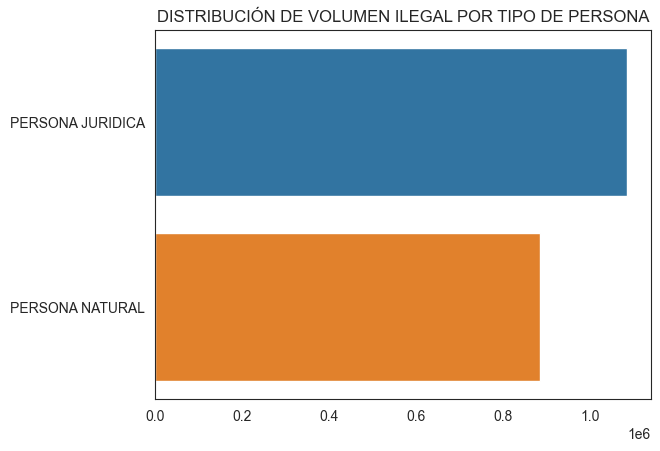

,VOLUMEN_ILEGAL,PORCENTAJE
TIPO_PERSONA,,
PERSONA JURIDICA,1085878.405,0.551
PERSONA NATURAL,886040.050,0.449


In [80]:
data_persona_ilegal=data.groupby("TIPO_PERSONA")[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_persona_ilegal["PORCENTAJE"] = data_persona_ilegal["VOLUMEN_ILEGAL"]/data_persona_ilegal["VOLUMEN_ILEGAL"].sum()
plot=sns.barplot(x=data_persona_ilegal["VOLUMEN_ILEGAL"], y=data_persona_ilegal.index)
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN DE VOLUMEN ILEGAL POR TIPO DE PERSONA")
plt.show()
data_persona_ilegal.head()

In [81]:
data_provincia_ilegal=data.groupby("PROVINCIA")[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_provincia_ilegal["PORCENTAJE"] = data_provincia_ilegal["VOLUMEN_ILEGAL"]/data_titular_ilegal["VOLUMEN_ILEGAL"].sum()
data_provincia_ilegal["PORCENTAJE_ACUMULADO"] = data_provincia_ilegal["PORCENTAJE"].cumsum()
data_provincia_ilegal.head(7)

,VOLUMEN_ILEGAL,PORCENTAJE,PORCENTAJE_ACUMULADO
PROVINCIA,,,
REQUENA,622833.241,0.316,0.316
LORETO,325196.456,0.165,0.481
MAYNAS,295881.199,0.150,0.631
UCAYALI,112240.200,0.057,0.688
TAMBOPATA,102203.921,0.052,0.740
MARISCAL RAMON CASTILLA,81503.462,0.041,0.781
DATEM DEL MARAÑON,76682.344,0.039,0.820


In [82]:
data_depar_ilegal=data.groupby("DEPARTAMENTO")[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_depar_ilegal["PORCENTAJE"] = data_depar_ilegal["VOLUMEN_ILEGAL"]/data_depar_ilegal["VOLUMEN_ILEGAL"].sum()
data_depar_ilegal["PORCENTAJE_ACUMULADO"] = data_depar_ilegal["PORCENTAJE"].cumsum()
data_depar_ilegal.head(7)

,VOLUMEN_ILEGAL,PORCENTAJE,PORCENTAJE_ACUMULADO
DEPARTAMENTO,,,
LORETO,1579274.176,0.801,0.801
MADRE DE DIOS,189839.477,0.096,0.897
UCAYALI,110523.483,0.056,0.953
AMAZONAS,26031.112,0.013,0.966
JUNIN,23687.244,0.012,0.978
HUANUCO,18790.091,0.010,0.988
PASCO,15927.211,0.008,0.996


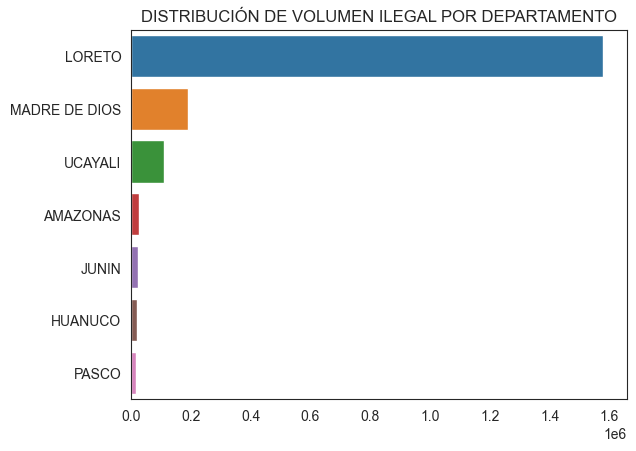

In [83]:
plot=sns.barplot(x=data_depar_ilegal["VOLUMEN_ILEGAL"][:7], y=data_depar_ilegal.index[:7])
plot.set(xlabel=None, ylabel=None)
plot.set_title("DISTRIBUCIÓN DE VOLUMEN ILEGAL POR DEPARTAMENTO")
plt.show()

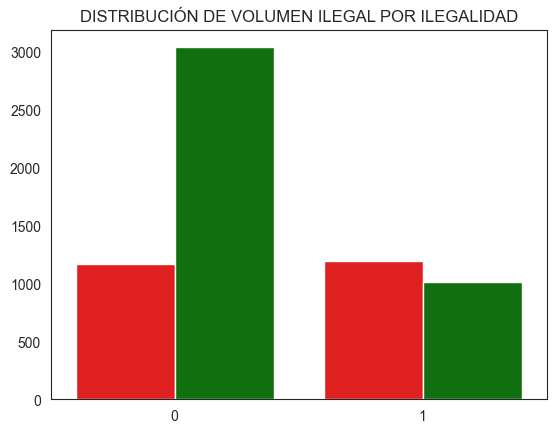

,ILEGAL,OBSERVATORIO,TITULAR
0,1,LISTA ROJA,1193
1,1,LISTA VERDE,1008
2,0,LISTA ROJA,1164
3,0,LISTA VERDE,3035


In [84]:
#ILEGAL
data_ilegal_obser = data.groupby(["ILEGAL", "OBSERVATORIO"])[["TITULAR"]].count().sort_values(by="ILEGAL", ascending=False)
data_ilegal_obser=data_ilegal_obser.reset_index()
plot=sns.barplot(y="TITULAR", x="ILEGAL", data=data_ilegal_obser, hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plot.set_title("DISTRIBUCIÓN DE VOLUMEN ILEGAL POR ILEGALIDAD")
plt.show()
data_ilegal_obser

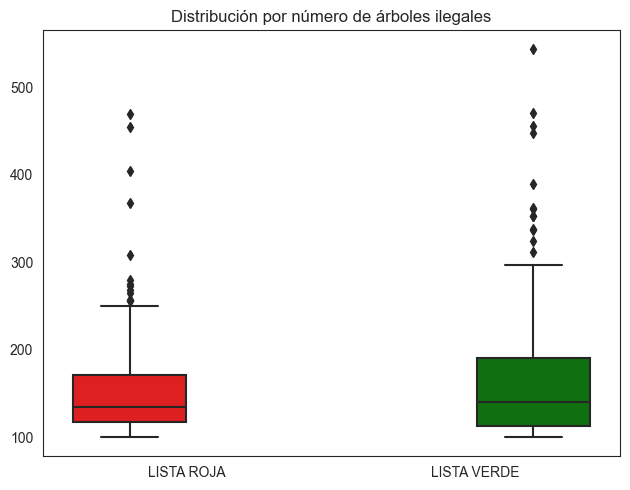

In [85]:
#ARBOLES_ILEGAL
plot=sns.boxplot(y="ARBOLES_ILEGAL", data=data[data["ARBOLES_ILEGAL"]>=100], x="OBSERVATORIO", hue="OBSERVATORIO", palette={"LISTA VERDE": "g", "LISTA ROJA": "r"})
plot.set(xlabel=None, ylabel=None)
plot.legend().set_visible(False)
plt.tight_layout()
plot.set_title("Distribución por número de árboles ilegales")
plt.show()

In [86]:
data.head()

,PLAN,TIPO_PLAN,MODALIDAD_APROVECHAMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,MACROREGION,SUPERFICIE,TITULAR,TIPO_PERSONA,AREA_TH,%AREA_TH,AREA_POA,%AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOLUMEN_APROBADO,FECHA_SUPERVISION,VOLUMEN_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,ARBOLES_ILEGAL,%VOLUMEN_MOVILIZADO,%VOLUMEN_ILEGAL,%VOLUMEN_LEGAL,ILEGAL,OBSERVATORIO,OBSERVATORIO_COD
0,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA YAMAKENTSA,PERSONA JURIDICA,287.650,0.001,287.650,0.001,58,4,648.290,2017-10-17,405.910,54,2,167.331,238.579,0,0.626,0.412,0.588,1,LISTA VERDE,1
1,DEMA,DEMA,Comunidad Nativa,10401,AMAZONAS,CONDORCANQUI,NIEVA,ORIENTE,448200.000,COMUNIDAD NATIVA WAISIM,PERSONA JURIDICA,221.330,0.000,221.330,0.000,72,9,635.980,2017-10-09,460.280,80,2,69.860,390.420,8,0.724,0.152,0.848,1,LISTA VERDE,1
2,DEMA,DEMA,Comunidad Nativa,10403,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,ORIENTE,803500.000,COMUNIDAD NATIVA FORTALEZA,PERSONA JURIDICA,633.330,0.001,633.330,0.001,35,1,467.810,2019-11-04,467.730,44,0,201.733,265.997,9,1.000,0.431,0.569,1,LISTA ROJA,0
3,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA SAWIENTSA,PERSONA JURIDICA,157.910,0.000,157.910,0.000,71,2,649.908,2020-02-22,562.720,63,0,171.000,244.396,0,0.866,0.304,0.434,1,LISTA VERDE,1
4,DEMA,DEMA,Comunidad Nativa,10205,AMAZONAS,BAGUA,IMAZA,ORIENTE,443100.000,COMUNIDAD NATIVA UMPUNCHIG,PERSONA JURIDICA,321.460,0.001,321.460,0.001,62,3,649.973,2019-10-24,649.790,76,0,600.097,49.693,14,1.000,0.924,0.076,1,LISTA ROJA,0


In [87]:
data_fecha_ilegal=data.groupby(["FECHA_SUPERVISION","OBSERVATORIO"])[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_fecha_ilegal["PORCENTAJE"] = data_fecha_ilegal["VOLUMEN_ILEGAL"]/data_fecha_ilegal["VOLUMEN_ILEGAL"].sum()
data_fecha_ilegal["PORCENTAJE_ACUMULADO"] = data_fecha_ilegal["PORCENTAJE"].cumsum()
data_fecha_ilegal = data_fecha_ilegal[data_fecha_ilegal["VOLUMEN_ILEGAL"]>0]
data_fecha_ilegal_sorted = data_fecha_ilegal.sort_values(by="FECHA_SUPERVISION")
data_fecha_ilegal_sorted=data_fecha_ilegal_sorted[data_fecha_ilegal_sorted.index.get_level_values("FECHA_SUPERVISION") > "2010-01-01"]
data_fecha_ilegal_sorted = data_fecha_ilegal_sorted.reset_index()
data_fecha_ilegal_sorted['FECHA_SUPERVISION'] = pd.to_datetime(data_fecha_ilegal_sorted['FECHA_SUPERVISION'])

monthly_data = data_fecha_ilegal_sorted.groupby([pd.Grouper(key='FECHA_SUPERVISION', freq='M'), 'OBSERVATORIO'])[['VOLUMEN_ILEGAL']].sum().reset_index()

fig = px.line(
    monthly_data,
    x="FECHA_SUPERVISION",
    y="VOLUMEN_ILEGAL",
    color="OBSERVATORIO",
    markers=True,
    labels={"FECHA_SUPERVISION": "Fecha de Supervisión", "VOLUMEN_ILEGAL": "Volumen Ilegal"},
    title="SERIE DE TIEMPO MENSUAL DE VOLUMEN ILEGAL POR OBSERVATORIO",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [88]:
data_fecha_ilegal=data.groupby(["FECHA_SUPERVISION","DEPARTAMENTO"])[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_fecha_ilegal["PORCENTAJE"] = data_fecha_ilegal["VOLUMEN_ILEGAL"]/data_fecha_ilegal["VOLUMEN_ILEGAL"].sum()
data_fecha_ilegal["PORCENTAJE_ACUMULADO"] = data_fecha_ilegal["PORCENTAJE"].cumsum()
data_fecha_ilegal = data_fecha_ilegal[data_fecha_ilegal["VOLUMEN_ILEGAL"]>0]
data_fecha_ilegal_sorted = data_fecha_ilegal.sort_values(by="FECHA_SUPERVISION")
data_fecha_ilegal_sorted=data_fecha_ilegal_sorted[data_fecha_ilegal_sorted.index.get_level_values("FECHA_SUPERVISION") > "2010-01-01"]
data_fecha_ilegal_sorted = data_fecha_ilegal_sorted.reset_index()
data_fecha_ilegal_sorted['FECHA_SUPERVISION'] = pd.to_datetime(data_fecha_ilegal_sorted['FECHA_SUPERVISION'])

monthly_data = data_fecha_ilegal_sorted.groupby([pd.Grouper(key='FECHA_SUPERVISION', freq='M'), 'DEPARTAMENTO'])[['VOLUMEN_ILEGAL']].sum().reset_index()

fig = px.line(
    monthly_data,
    x="FECHA_SUPERVISION",
    y="VOLUMEN_ILEGAL",
    color="DEPARTAMENTO",
    markers=True,
    labels={"FECHA_SUPERVISION": "Fecha de Supervisión", "VOLUMEN_ILEGAL": "Volumen Ilegal"},
    title="SERIE DE TIEMPO MENSUAL DE VOLUMEN ILEGAL POR DEPARTAMENTO",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [89]:
data_fecha_ilegal=data.groupby(["FECHA_SUPERVISION","MODALIDAD_APROVECHAMIENTO"])[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_fecha_ilegal["PORCENTAJE"] = data_fecha_ilegal["VOLUMEN_ILEGAL"]/data_fecha_ilegal["VOLUMEN_ILEGAL"].sum()
data_fecha_ilegal["PORCENTAJE_ACUMULADO"] = data_fecha_ilegal["PORCENTAJE"].cumsum()
data_fecha_ilegal = data_fecha_ilegal[data_fecha_ilegal["VOLUMEN_ILEGAL"]>0]
data_fecha_ilegal_sorted = data_fecha_ilegal.sort_values(by="FECHA_SUPERVISION")
data_fecha_ilegal_sorted=data_fecha_ilegal_sorted[data_fecha_ilegal_sorted.index.get_level_values("FECHA_SUPERVISION") > "2010-01-01"]
data_fecha_ilegal_sorted = data_fecha_ilegal_sorted.reset_index()
data_fecha_ilegal_sorted['FECHA_SUPERVISION'] = pd.to_datetime(data_fecha_ilegal_sorted['FECHA_SUPERVISION'])

monthly_data = data_fecha_ilegal_sorted.groupby([pd.Grouper(key='FECHA_SUPERVISION', freq='M'), 'MODALIDAD_APROVECHAMIENTO'])[['VOLUMEN_ILEGAL']].sum().reset_index()

fig = px.line(
    monthly_data,
    x="FECHA_SUPERVISION",
    y="VOLUMEN_ILEGAL",
    color="MODALIDAD_APROVECHAMIENTO",
    markers=True,
    labels={"FECHA_SUPERVISION": "Fecha de Supervisión", "VOLUMEN_ILEGAL": "Volumen Ilegal"},
    title="SERIE DE TIEMPO MENSUAL DE VOLUMEN ILEGAL POR MODALIDAD",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [90]:
data_fecha_ilegal=data.groupby(["FECHA_SUPERVISION","TIPO_PERSONA"])[["VOLUMEN_ILEGAL"]].sum().sort_values(by="VOLUMEN_ILEGAL", ascending=False)
data_fecha_ilegal["PORCENTAJE"] = data_fecha_ilegal["VOLUMEN_ILEGAL"]/data_fecha_ilegal["VOLUMEN_ILEGAL"].sum()
data_fecha_ilegal["PORCENTAJE_ACUMULADO"] = data_fecha_ilegal["PORCENTAJE"].cumsum()
data_fecha_ilegal = data_fecha_ilegal[data_fecha_ilegal["VOLUMEN_ILEGAL"]>0]
data_fecha_ilegal_sorted = data_fecha_ilegal.sort_values(by="FECHA_SUPERVISION")
data_fecha_ilegal_sorted=data_fecha_ilegal_sorted[data_fecha_ilegal_sorted.index.get_level_values("FECHA_SUPERVISION") > "2010-01-01"]
data_fecha_ilegal_sorted = data_fecha_ilegal_sorted.reset_index()
data_fecha_ilegal_sorted['FECHA_SUPERVISION'] = pd.to_datetime(data_fecha_ilegal_sorted['FECHA_SUPERVISION'])

monthly_data = data_fecha_ilegal_sorted.groupby([pd.Grouper(key='FECHA_SUPERVISION', freq='M'), 'TIPO_PERSONA'])[['VOLUMEN_ILEGAL']].sum().reset_index()

fig = px.line(
    monthly_data,
    x="FECHA_SUPERVISION",
    y="VOLUMEN_ILEGAL",
    color="TIPO_PERSONA",
    markers=True,
    labels={"FECHA_SUPERVISION": "Fecha de Supervisión", "VOLUMEN_ILEGAL": "Volumen Ilegal"},
    title="SERIE DE TIEMPO MENSUAL DE VOLUMEN ILEGAL POR TIPO DE PERSONA",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

DISTRIBUCIÓN MULTIVARIADO

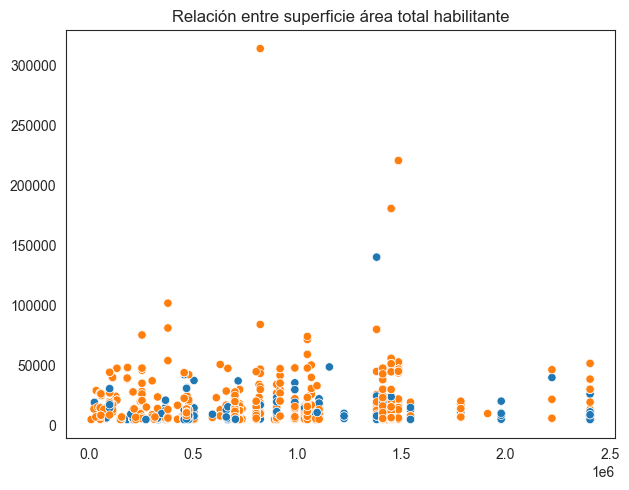

In [91]:
#SUPERFICIE - AREA_TH
plot=sns.scatterplot(x="SUPERFICIE", y="AREA_TH", data=data[data["AREA_TH"]>5000], hue="OBSERVATORIO_COD", legend=False)
plot.set(xlabel=None, ylabel=None)
plt.tight_layout()
plot.set_title("Relación entre superficie área total habilitante")
plt.show()

In [92]:
feat_num=data.select_dtypes(include=[np.number])
feat_obj=data.select_dtypes(include=["object"])
feat_num.drop(["%AREA_TH","%AREA_POA","ARBOLES_ILEGAL","%VOLUMEN_MOVILIZADO","%VOLUMEN_ILEGAL","%VOLUMEN_LEGAL", "ILEGAL"], axis=1, inplace=True)
feat_num=feat_num[(feat_num["AREA_TH"] > 0)&(feat_num["AREA_POA"] > 0)&(feat_num["VOLUMEN_APROBADO"] > 0)&(feat_num["VOLUMEN_MOVILIZADO"] > 0)&(feat_num["ARBOLES_SUPERVISADOS"] > 0)&(feat_num["ARBOLES_INEXISTENTES"] > 0)&(feat_num["VOLUMEN_ILEGAL"] > 0)&(feat_num["VOLUMEN_LEGAL"] > 0)]
feat_num.describe()

,SUPERFICIE,AREA_TH,AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOLUMEN_APROBADO,VOLUMEN_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,OBSERVATORIO_COD
count,306.000,306.000,306.000,306.000,306.000,306.000,306.000,306.000,306.000,306.000,306.000,306.000
mean,746859.477,3414.013,522.763,562.275,13.794,3723.837,1703.947,155.062,11.013,279.370,391.343,0.637
std,548522.344,11005.615,1026.713,1274.904,10.194,8371.465,3495.706,102.018,24.949,343.910,589.949,0.482
min,1400.000,1.430,1.430,0.000,1.000,75.260,28.455,22.000,1.000,1.577,0.012,0.000
25%,379400.000,82.035,75.032,97.000,6.000,646.966,334.893,91.500,1.000,56.980,66.982,0.000
50%,644850.000,539.755,269.075,197.500,12.000,1491.498,642.275,126.500,2.000,168.597,196.461,1.000
75%,966650.000,1619.852,535.505,525.500,19.000,3537.818,1667.447,197.750,6.750,358.153,437.752,1.000
max,2405000.000,140041.030,9851.890,12417.000,57.000,84441.872,41640.473,810.000,155.000,2337.928,4254.439,1.000


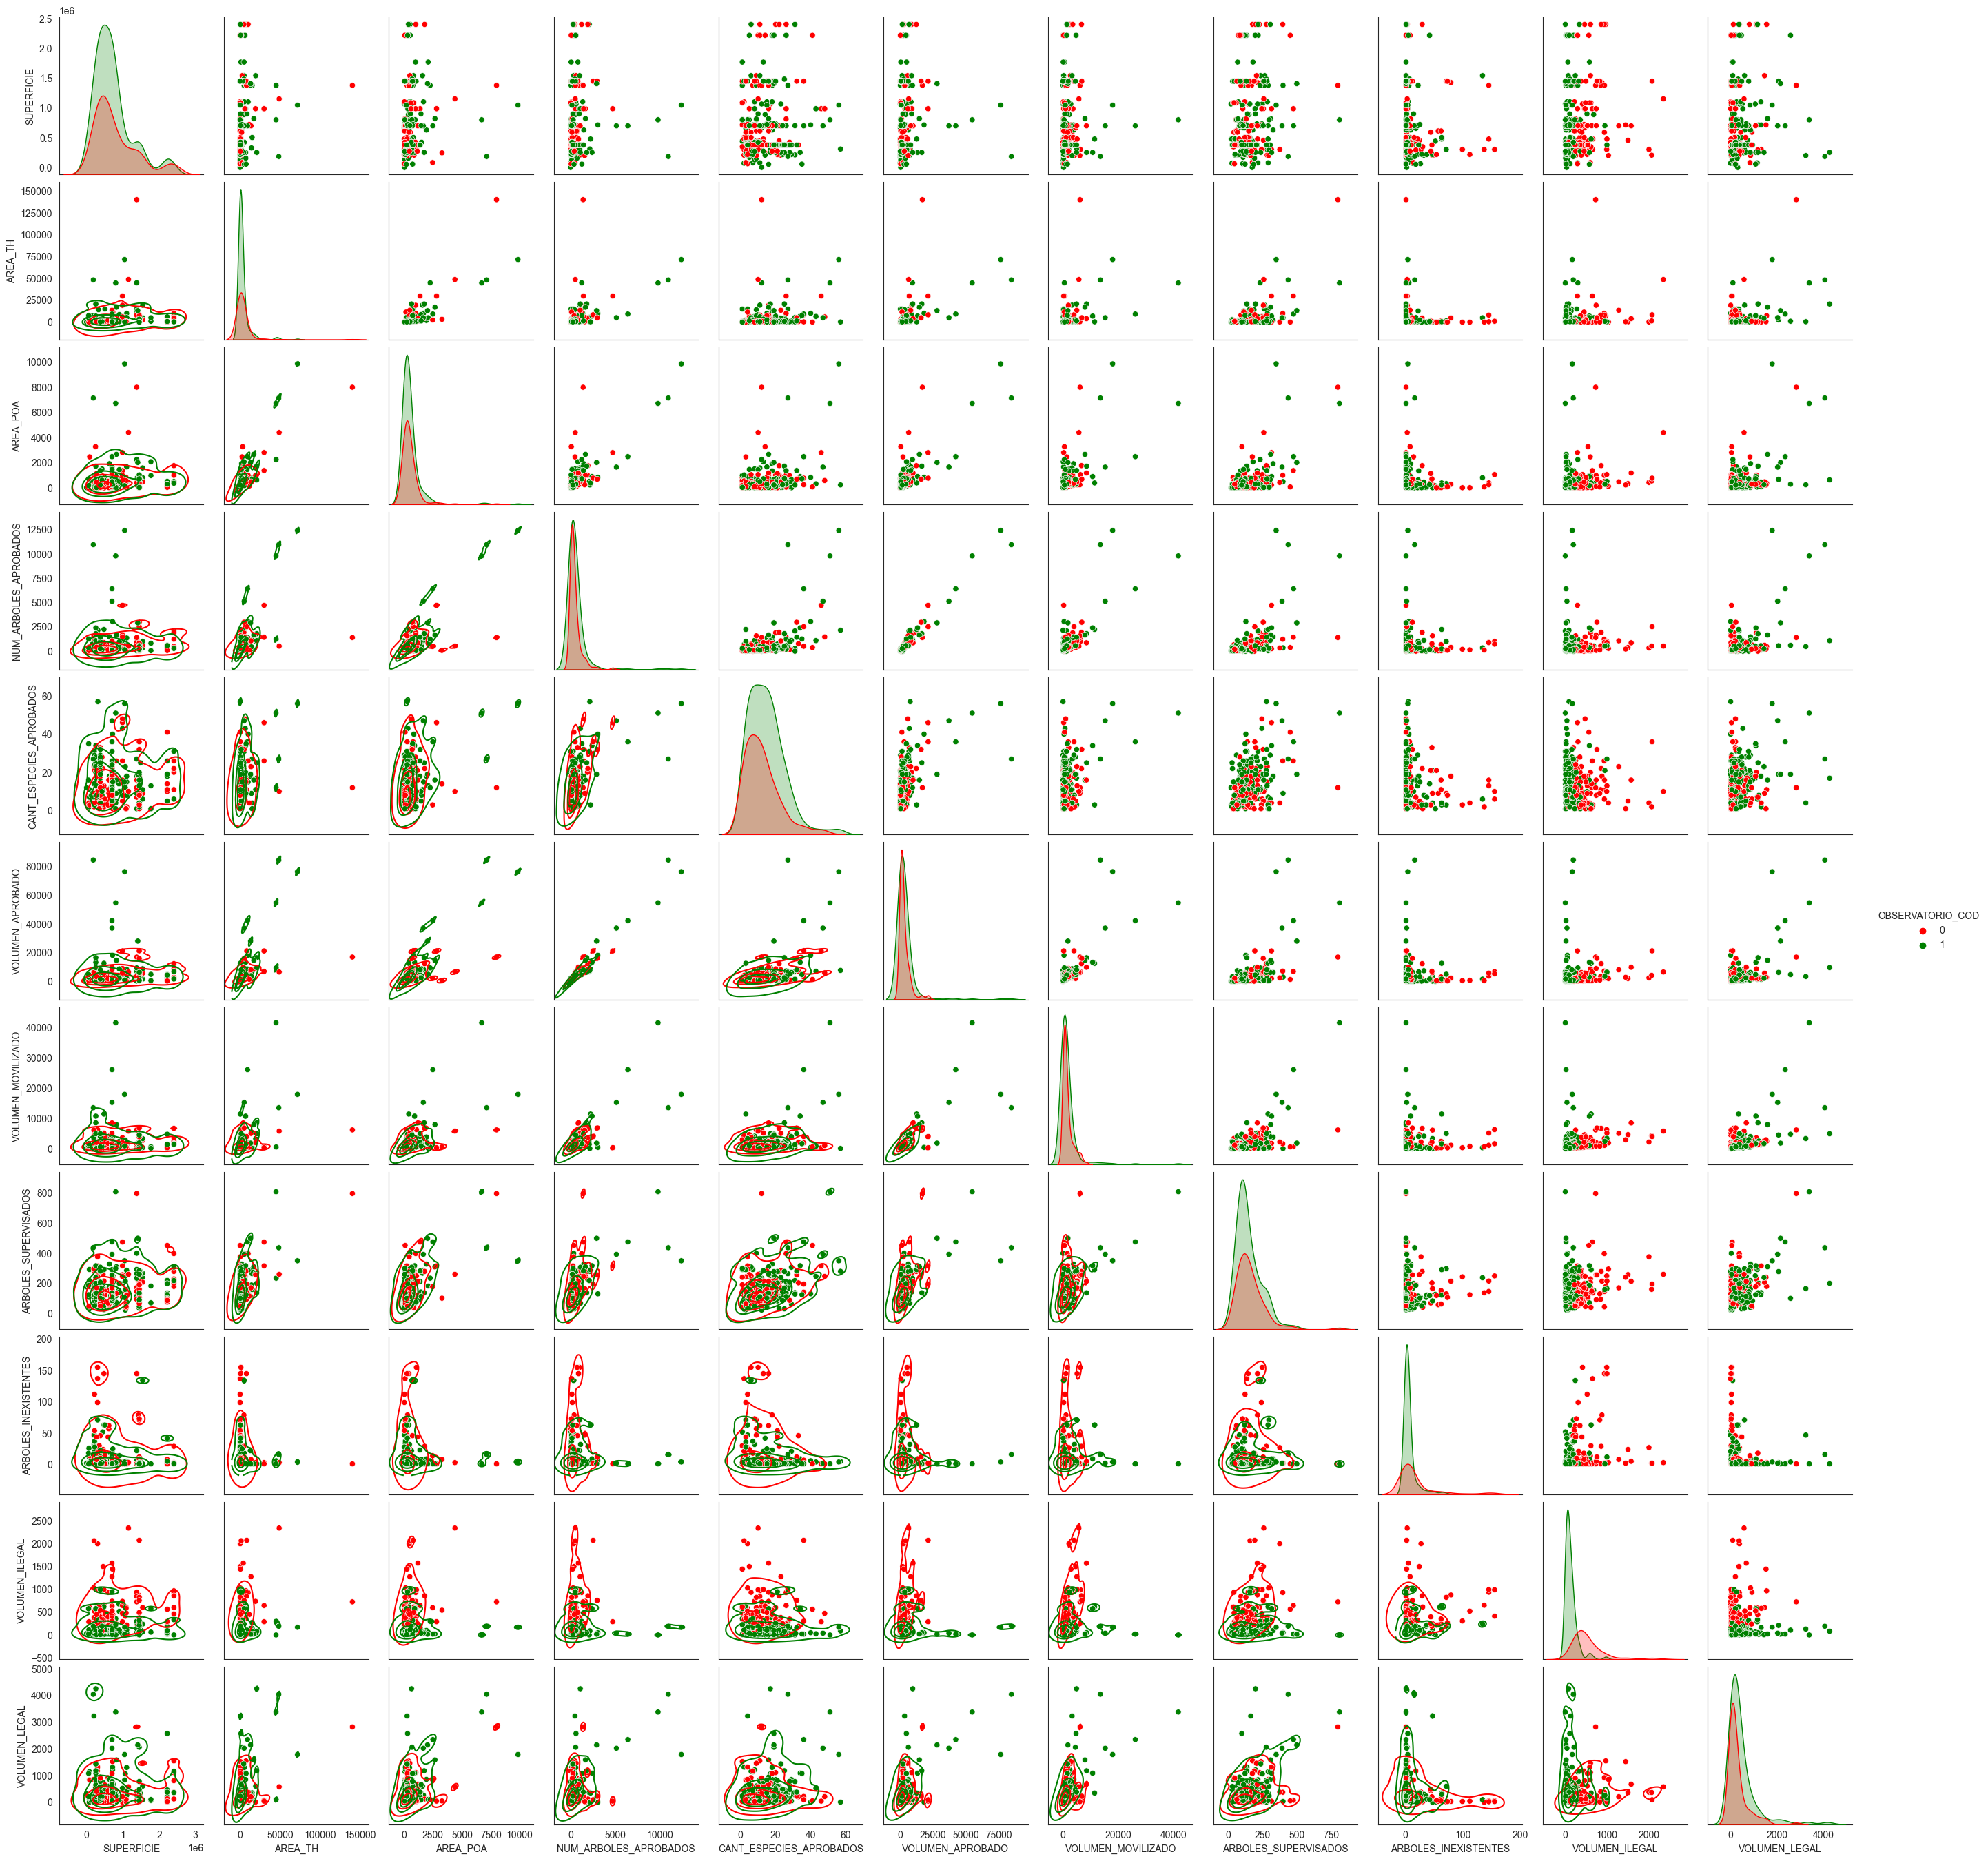

In [93]:
g = sns.pairplot(feat_num, diag_kind="kde", hue="OBSERVATORIO_COD", palette={1:"g", 0:"r"})
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

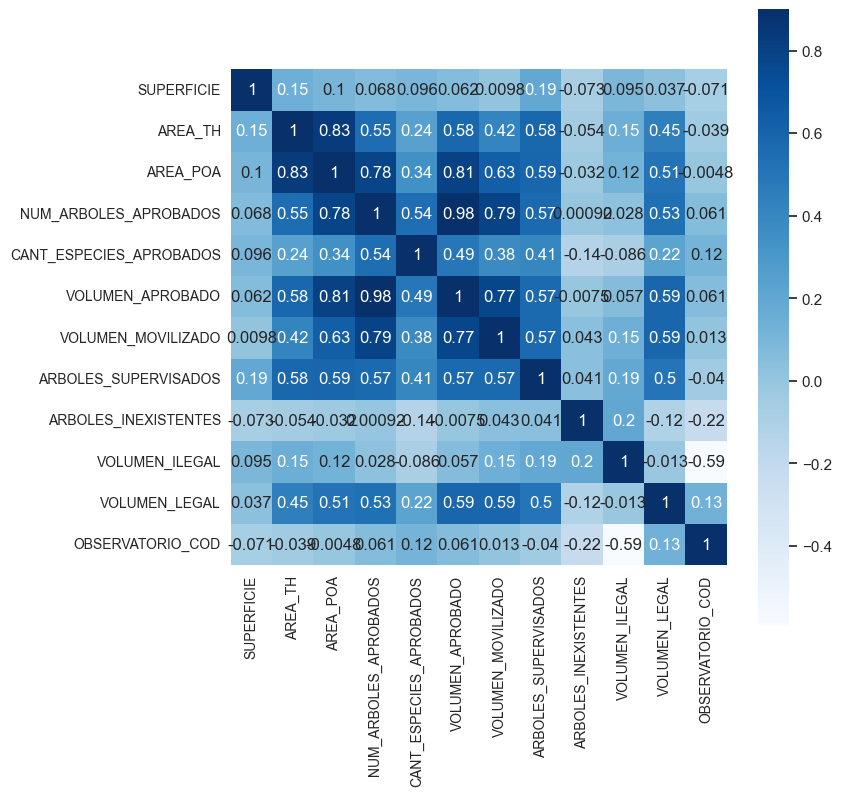

In [94]:
corrmat = feat_num.corr()
plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corrmat,vmax=0.9, cmap="Blues", square=True, annot=True)
plt.show()

In [95]:
data.describe()

,SUPERFICIE,AREA_TH,%AREA_TH,AREA_POA,%AREA_POA,NUM_ARBOLES_APROBADOS,CANT_ESPECIES_APROBADOS,VOLUMEN_APROBADO,FECHA_SUPERVISION,VOLUMEN_MOVILIZADO,ARBOLES_SUPERVISADOS,ARBOLES_INEXISTENTES,VOLUMEN_ILEGAL,VOLUMEN_LEGAL,ARBOLES_ILEGAL,%VOLUMEN_MOVILIZADO,%VOLUMEN_ILEGAL,%VOLUMEN_LEGAL,ILEGAL,OBSERVATORIO_COD
count,6400.000,6400.000,6400.000,6400.000,6400.000,6400.000,6400.000,6400.000,6400,6400.000,6400.000,6400.000,6400.000,6400.000,6400.000,6199.000,5202.000,5268.000,6400.000,6400.000
mean,738638.641,5169.944,0.012,417.513,0.001,567.976,12.827,3728.345,2015-12-03 19:23:42,1369.874,114.887,20.936,308.112,122.117,14.868,0.487,0.218,0.257,0.344,0.632
min,1400.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2004-10-21 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,379400.000,46.708,0.000,33.487,0.000,50.000,6.000,457.330,2012-11-12 12:00:00,69.077,48.000,0.000,0.000,0.000,0.000,0.116,0.000,0.000,0.000,0.000
50%,659400.000,500.000,0.001,122.735,0.000,128.000,11.000,1030.250,2015-11-23 00:00:00,374.575,95.000,1.000,0.000,0.000,0.000,0.465,0.000,0.000,0.000,1.000
75%,1035000.000,5000.000,0.005,406.368,0.001,490.500,17.000,3379.812,2018-10-13 00:00:00,1211.161,149.000,9.000,75.401,0.000,12.000,0.814,0.307,0.053,1.000,1.000
max,2405000.000,313430.680,0.814,45779.000,0.069,27361.000,78.000,213341.620,2023-04-27 00:00:00,54392.010,1702.000,1191.000,28154.023,9894.030,543.000,21.344,5.687,477.467,1.000,1.000
std,551793.953,13987.136,0.045,1049.369,0.003,1374.784,9.683,8779.163,NaN,2983.745,108.942,57.410,1285.919,444.327,39.027,0.517,0.377,6.639,0.475,0.482


In [97]:
#GUARDAR ARCHIVO PARA EL MODELADO
data.to_csv("data_modelado.csv", encoding="utf-8", index=False)